In [2]:
from scipy.ndimage.filters import gaussian_filter
from scipy.fftpack import fft2, ifft2

In [1]:
import math

In [2]:
import torch
import torchvision
from torchvision import transforms
from my_models import create_myResnet18
from utils import colorMap, set_seed, pearsonr_torch
from analysis import compute_acc, robust_test_topk
import time
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset
import numpy as np
import torch.nn.functional as F
from PIL import Image
import pickle

In [3]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=3)

In [4]:
preprocess_with_norm = transforms.Compose([
        transforms.Resize(224), #input_size=224 imagenet size
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #All pretrained torchvision models have the same preprocessing, which is to normalize using these mean/std values per RGB channel
])

preprocess_NO_norm = transforms.Compose([
        transforms.Resize(224), #input_size=224 imagenet size
        transforms.CenterCrop(224),
        transforms.ToTensor()
])

In [5]:
# trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,download=True, transform=train_preprocess)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)

In [6]:
testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, download=True, 
                                       transform=preprocess_NO_norm)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,shuffle=False, num_workers=4) #batch_size=256 when testing

Files already downloaded and verified


In [7]:
seed_list2=[209, 392, 558, 829, 904, 963]

# layer4 gaussian blur

In [6]:
gaussianblur_dvals = [i for i in range(1,21)]
gaussianblur_dvals

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [7]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    robust_per_epoch=[]
    y_pred_per_epoch=[]
    for rdm in ['humanIT_b2.0','humanIT_b0','humanIT_neg_b2.0','randn_b2.0','humanEV_b2.0','humanIT_bNone']:
        print("rdm", rdm)
        robust_per_rdm=[]
        y_pred_per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer4_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = create_myResnet18(True)
            net.load_state_dict(torch.load(path, map_location=device))
            y_pred_list, test_acc_list= robust_test_topk(net, testloader, device, 'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
            robust_result = np.array(test_acc_list).transpose()
            robust_per_rdm.append(robust_result)
            y_pred_per_rdm.append(y_pred_list)
        robust_per_epoch.append(robust_per_rdm)
        y_pred_per_epoch.append(y_pred_per_rdm)
        
    robust_per_epoch = np.array(robust_per_epoch)
    y_pred_per_epoch = np.array(y_pred_per_epoch)
    filename = f'./robust/resnet18_layer4/resnet18_layer4_robust_gaussianblur_epoch{epoch}_seedlist2.npy'
    np.save(filename, robust_per_epoch)
    filename = f'./robust/resnet18_layer4/resnet18_layer4_y_pred_gaussianblur_epoch{epoch}_seedlist2.npy'
    np.save(filename, y_pred_per_epoch)

epoch: 10
rdm humanIT_b2.0
seed 209
./state_dict/resnet18_layer4_humanIT_b2.0_seed209_epoch10_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanIT_b2.0_seed392_epoch10_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_humanIT_b2.0_seed558_epoch10_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7


GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_randn_b2.0_seed829_epoch10_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_randn_b2.0_seed904_epoch10_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer4_randn_b2.0_seed963_epoch10_luffycuda

GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_b0
seed 209
./state_dict/resnet18_layer4_humanIT_b0_seed209_epoch9_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanIT_b0_seed392_epoch9_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
Ga

GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanEV_b2.0_seed829_epoch9_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_humanEV_b2.0_seed904_epoch9_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
G

seed 963
./state_dict/resnet18_layer4_humanIT_b0_seed963_epoch8_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_neg_b2.0
seed 209
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed209_epoch8_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed392_epoch8_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
Gau

GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_humanIT_bNone_seed558_epoch8_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanIT_bNone_seed829_epoch8_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_humanIT_bNone_seed904_epoch8_luffycuda:5.pt
GaussianBlur 1
Gauss

GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed963_epoch7_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm randn_b2.0
seed 209
./state_dict/resnet18_layer4_randn_b2.0_seed209_epoch7_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBl

GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_humanIT_b2.0_seed558_epoch6_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanIT_b2.0_seed829_epoch6_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
G

seed 904
./state_dict/resnet18_layer4_randn_b2.0_seed904_epoch6_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer4_randn_b2.0_seed963_epoch6_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanEV_b2.0
seed 209
./state_dict/resnet18_layer4_humanEV_b2.0_seed209_epoch6_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
Ga

GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanIT_b0_seed392_epoch5_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_humanIT_b0_seed558_epoch5_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanIT_b0_seed829_epoch5_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2

GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_humanEV_b2.0_seed904_epoch5_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer4_humanEV_b2.0_seed963_epoch5_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanI

GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed392_epoch4_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed558_epoch4_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianB

GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanIT_bNone_seed829_epoch4_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_humanIT_bNone_seed904_epoch4_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer4_humanIT_bNone_seed963_epoch4_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlu

GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm randn_b2.0
seed 209
./state_dict/resnet18_layer4_randn_b2.0_seed209_epoch3_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_randn_b2.0_seed392_epoch3_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_randn_b2.0_seed558_epoch3_luffycuda:5.p

GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanIT_b2.0_seed829_epoch2_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_humanIT_b2.0_seed904_epoch2_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur

GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanEV_b2.0
seed 209
./state_dict/resnet18_layer4_humanEV_b2.0_seed209_epoch2_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanEV_b2.0_seed392_epoch2_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13


GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer4_humanIT_b0_seed558_epoch1_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer4_humanIT_b0_seed829_epoch1_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer4_humanIT_b0_seed904_epoch1_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
Gaus

GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer4_humanEV_b2.0_seed963_epoch1_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_bNone
seed 209
./state_dict/resnet18_layer4_humanIT_bNone_seed209_epoch1_luffycuda:5.pt
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer4_humanIT_bNone_seed392_epoch1_lu

# layer4 gaussian

In [8]:
gaussian_dvals=[i*0.01 for i in range(31)]
gaussian_dvals

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3]

In [ ]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    robust_per_epoch=[]
    y_pred_per_epoch=[]
    for rdm in ['humanIT_b2.0','humanIT_b0','humanIT_neg_b2.0','randn_b2.0','humanEV_b2.0','humanIT_bNone']:
        print("rdm", rdm)
        robust_per_rdm=[]
        y_pred_per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer4_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = create_myResnet18(True)
            net.load_state_dict(torch.load(path, map_location=device))
            y_pred_list, test_acc_list= robust_test_topk(net, testloader, device, 'Gaussian',gaussian_dvals, (1,2,3,4,5))
            robust_result = np.array(test_acc_list).transpose()
            robust_per_rdm.append(robust_result)
            y_pred_per_rdm.append(y_pred_list)
        robust_per_epoch.append(robust_per_rdm)
        y_pred_per_epoch.append(y_pred_per_rdm)
        
    robust_per_epoch = np.array(robust_per_epoch)
    y_pred_per_epoch = np.array(y_pred_per_epoch)
    filename = f'./robust/resnet18_layer4/resnet18_layer4_robust_gaussian_epoch{epoch}_seedlist2.npy'
    np.save(filename, robust_per_epoch)
    filename = f'./robust/resnet18_layer4/resnet18_layer4_y_pred_gaussian_epoch{epoch}_seedlist2.npy'
    np.save(filename, y_pred_per_epoch)

epoch: 10
rdm humanIT_b2.0
seed 209
./state_dict/resnet18_layer4_humanIT_b2.0_seed209_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer4_humanIT_b2.0_seed392_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaus

# layer4 highcontrast

In [9]:
highcontrast_dvals = [0.0,0.2,0.4,0.6,0.8,1.0]+[math.pow(1.12, i) for i in range(2,31)] #[0.5*i for i in range(20)]+[1.0+1.0*i for i in range(30)]
print(highcontrast_dvals)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2544000000000002, 1.4049280000000004, 1.5735193600000006, 1.7623416832000007, 1.973822685184001, 2.2106814074060814, 2.4759631762948113, 2.773078757450189, 3.105848208344212, 3.478549993345518, 3.8959759925469806, 4.363493111652619, 4.887112285050933, 5.4735657592570455, 6.130393650367892, 6.866040888412039, 7.689965795021485, 8.612761690424064, 9.646293093274952, 10.803848264467948, 12.100310056204103, 13.552347262948595, 15.178628934502429, 17.00006440664272, 19.04007213543985, 21.324880791692635, 23.883866486695755, 26.749930465099247, 29.95992212091116]


In [10]:
# highcontrast
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    robust_per_epoch=[]
    y_pred_per_epoch=[]
    for rdm in ['humanIT_b2.0','humanIT_b0','humanIT_neg_b2.0','randn_b2.0','humanEV_b2.0','humanIT_bNone']:
        print("rdm", rdm)
        robust_per_rdm=[]
        y_pred_per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer4_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = create_myResnet18(True)
            net.load_state_dict(torch.load(path, map_location=device))
            y_pred_list, test_acc_list= robust_test_topk(net, testloader, device, 'HighContrast',highcontrast_dvals, (1,2,3,4,5))
            robust_result = np.array(test_acc_list).transpose()
            robust_per_rdm.append(robust_result)
            y_pred_per_rdm.append(y_pred_list)
        robust_per_epoch.append(robust_per_rdm)
        y_pred_per_epoch.append(y_pred_per_rdm)
        
    robust_per_epoch = np.array(robust_per_epoch)
    y_pred_per_epoch = np.array(y_pred_per_epoch)
    filename = f'./robust/resnet18_layer4/resnet18_layer4_robust_highcontrast_epoch{epoch}_seedlist2.npy'
    np.save(filename, robust_per_epoch)
    filename = f'./robust/resnet18_layer4/resnet18_layer4_y_pred_highcontrast_epoch{epoch}_seedlist2.npy'
    np.save(filename, y_pred_per_epoch)

epoch: 10
rdm humanIT_b2.0
seed 209
./state_dict/resnet18_layer4_humanIT_b2.0_seed209_epoch10_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
Hi

HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanIT_b0_seed558_epoch10_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.210681407406081

HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed829_epoch10_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.55234726

HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_randn_b2.0_seed963_epoch10_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006

HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_bNone
seed 209
./state_dict/resnet18_layer4_humanIT_bNone_seed209_epoch10_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContra

HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanIT_b2.0_seed558_epoch9_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
H

HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanIT_b0_seed829_epoch9_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.86604088841203

HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed963_epoch9

HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanEV_b2.0
seed 209
./state_dict/resnet18_layer4_humanEV_b2.0_seed209_epoch9_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContras

HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29

HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanIT_b2.0_seed829_epoch8_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.4785499933455

HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29

HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm randn_b2.0
seed 209
./state_dict/resnet18_layer4_randn_b2.0_seed209_epoch8_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.

HighContrast 29.95992212091116
seed 392
./state_dict/resnet18_layer4_humanEV_b2.0_seed392_epoch8_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985

HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanIT_bNone_seed829_epoch8_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060

HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 904
./state_dict/resnet18_layer4_humanIT_b2.0_seed904_epoch7_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.5523472629485

HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_neg_b2.0
seed 209
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed209_epoch7_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighC

HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 392
./state_dict/resnet18_layer4_randn_b2.0_seed392_epoch7_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
H

HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanEV_b2.0_seed829_epoch7_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002

HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 904
./state_dict/resnet18_layer4_humanIT_bNone_seed904_epoch7_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021

HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_b0
seed 209
./state_dict/resnet18_layer4_humanIT_b0_seed209_epoch6_luffycuda:5.pt
HighContrast 0.0
HighCon

HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 392
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed392_epoch6_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.473565759

HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_d

HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 904
./state_dict/resnet18_layer4_humanEV_b2.0_seed904_epoch6_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.89597599254698

HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29

HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 392
./state_dict/resnet18_layer4_humanIT_b0_seed392_epoch5_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212

HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed558_epoch5_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.0400721354

HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 904
./state_dict/resnet18_layer4_randn_b2.0_seed904_epoch5_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814

HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_humanEV_b2.0_seed963_epoch5_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.5523472629485

HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 392
./state_dict/resnet18_layer4_humanIT_b2.0_seed392_epoch4_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.404928000000000

HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanIT_b0_seed558_epoch4_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
H

HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 904
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed904_epoch4_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast

HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_randn_b2.0_seed963_epoch4_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.86604088841203

HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 392
./state_dict/resnet18_layer4_humanIT_bNone_seed392_epoch4_lu

HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanIT_b2.0_seed558_epoch3_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.3634931116526

HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29

HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed963_epoch3_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208

rdm humanEV_b2.0
seed 209
./state_dict/resnet18_layer4_humanEV_b2.0_seed209_epoch3_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 

HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanIT_bNone_seed558_epoch3_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.475963176294

HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanIT_b2.0_seed829_epoch2_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.1786289345024

HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_humanIT_b0_seed963_epoch2_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001


HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm randn_b2.0
seed 209
./state_dict/resnet18_layer4_randn_b2.0_seed209_epoch2_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.80

HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_dict/resnet18_layer4_humanEV_b2.0_seed558_epoch2_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002

HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanIT_bNone_seed829_epoch2_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021

HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 963
./state_dict/resnet18_layer4_humanIT_b2.0_seed963_epoch1_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
Hig

HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_neg_b2.0
seed 209
./state_dict/resnet18_layer4_humanIT_neg_b2.0_seed209_epoch1_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
Hi

HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 558
./state_d

HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 829
./state_dict/resnet18_layer4_humanEV_b2.0_seed829_epoch1_luffycuda:5.pt
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.89597599254698

HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29

In [18]:
gaussian_dvals = [i*0.01 for i in range(20)]+[i*0.02 for i in range(10,31)]
lowcontrast_dvals = [i*0.04 for i in range(12)]+[i*0.02 for i in range(24,51)]

In [20]:
len(gaussian_dvals)

41

In [7]:
def create_92stimuli_tensor_list():
    
    stimuli_tensors = []
    preprocess = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), 
                                              transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                                                   std=[0.229, 0.224, 0.225])])
    for i in range(92):    
        img_name ='./humanIT_92stimuli/stimulus' + str(i + 1) + '.tif'
        img_PIL = Image.open(img_name)
        image_propcessed = preprocess(img_PIL)
        stimuli = image_propcessed.unsqueeze(0).to(device)
        stimuli_tensors.append(stimuli)
        
    print("Num of stimuli is:", len(stimuli_tensors), " stimuli tensor dim is:", stimuli_tensors[0].size())
    print("stimuli tensor type is: ",
          stimuli_tensors[0].type())
    return stimuli_tensors

stimuli_set = create_92stimuli_tensor_list()

print('min, max, mean: ',stimuli_set[0].min(), stimuli_set[0].max(), stimuli_set[0].mean())
print("require_grad: ", stimuli_set[0].requires_grad)

Num of stimuli is: 92  stimuli tensor dim is: torch.Size([1, 3, 224, 224])
stimuli tensor type is:  torch.cuda.FloatTensor
min, max, mean:  tensor(-1.7696, device='cuda:3') tensor(2.2489, device='cuda:3') tensor(0.2428, device='cuda:3')
require_grad:  False


In [13]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision
# from utils import pearsonr_torch
# import numpy as np


# class myResnet18(nn.Module):
#     def __init__(self):
#         super(myResnet18, self).__init__()
#         self.net = torchvision.models.resnet18(pretrained=True)
#         #in_features = pretrained_resnet18.fc.in_features, for resnet18 it is 512
#         self.net.fc = nn.Linear(in_features=512, out_features=10, bias=True)
#         self.layer_weight = nn.Parameter(torch.ones(5, dtype=torch.float)) 
        
#     def forward(self, x):
#         x0 = self.net.maxpool(self.net.relu(self.net.bn1(self.net.conv1(x))))
#         x1 = self.net.layer1(x0) 
#         x2 = self.net.layer2(x1)
#         x3 = self.net.layer3(x2)
#         x4 = self.net.layer4(x3)
#         out = self.net.avgpool(x4)
#         batch_size = out.size()[0] 
#         out = out.view(batch_size, -1)
#         out = self.net.fc(out)
#         features = [x0, x1, x2, x3, x4]
#         #print("\tIn Model: input size", x.size(),"output size", out.size())
#         return out, features

#     def feature_distance_all(self, xi, xj):
#         '''
#         xi: batch of image tensors (batch, C, W, H)
#         xj: batch of image tensors (batch, C, W, H)   
#         return the list of feature distance(layer0, 1, 2, 3, 4)
#         '''
#         assert xi.shape == xj.shape
#         batch_size = xi.shape[0]
#         _, xi_features= self.forward(xi)
#         _, xj_features = self.forward(xj)
    
#         distance_list = []
#         for idx in range(len(xi_features)):
#             scores = torch.stack([1- pearsonr_torch(f_i.flatten(), f_j.flatten())\
#                                   for i, (f_i, f_j) in enumerate(zip(xi_features[idx], xj_features[idx]))] \
#                                   ,dim=0)
#             distance_list.append(scores)
#         return distance_list
    
#     def feature_distance(self, xi, xj, layer_num=None):
    
#         s_list = self.feature_distance_all(xi, xj)
#         score = None 
        
#         if layer_num==None:
#             '''
#             all layers, adaptive learnable layer weight
#             '''
#             #score = (torch.stack(s_list, dim = 1)*self.layer_weight).sum(dim=1)
#             score = (torch.stack(s_list, dim = 1)*F.softmax(self.layer_weight,dim=0)).sum(dim=1) #learnable weight
#         else:
#             #feature distances for individual layers
#             score = s_list[layer_num]
          
#         return score

In [136]:
# def distort_image(images, d_type, d_val):
#     '''
#     images are tensor of RGB images with NO normalization and have alread been sent to device, batch*C*H*W, 
#     '''             
#     if d_type=='LowPass' or d_type=='HighPass' or d_type=='PhaseJitter':
#         if d_type=='LowPass':
#             #Use Tensor.cpu() to copy the tensor to host memory first.
#             i_lowpassed = gaussian_filter(images.numpy(), [0, 0, d_val, d_val],
#                                           mode='constant', cval=0.5)
#             images = torch.tensor(i_lowpassed)
#         elif d_type=='HighPass':
#             i_lowpassed = gaussian_filter(images.numpy(), [0, 0, d_val, d_val],
#                                           mode='constant', cval=0.5)
#             i_highpassed = images-torch.tensor(i_lowpassed, dtype=torch.float)
#             i_diff = 0.5-i_highpassed.mean(dim=(1, 2, 3), keepdim=True)
#             images = i_highpassed+i_diff
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='PhaseJitter':
#             batch_size, img_size = images.shape[0], images.shape[2]
#             dtheta = (np.random.rand(batch_size, 1, img_size, img_size)-0.5)*2*np.pi*d_val
#             nfreq = img_size//2
#             dtheta[:, 0, 0, 0] = 0
#             dtheta[:, 0, nfreq, nfreq] = np.pi
#             dtheta[:, 0, 0, -1:-nfreq:-1] = -dtheta[:, 0, 0, 1:nfreq]
#             dtheta[:, 0, -1:-nfreq:-1, 0] = -dtheta[:, 0, 1:nfreq, 0]
#             dtheta[:, 0, -1:-nfreq:-1, -1:-2*nfreq:-1] = -dtheta[:, 0, 1:nfreq, 1:2*nfreq]
#             dtheta[:, 0, nfreq, -1:-nfreq:-1] = -dtheta[:, 0, nfreq, 1:nfreq]
#             images = torch.tensor(np.real(ifft2(fft2(images.numpy())*np.exp(1j*dtheta))), dtype=torch.float)
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='LowPassNoise':
#             i_noise = gaussian_filter(np.random.randn(*images.shape), [0, 0, 1.5, 1.5],
#                                       mode='constant', cval=0.)
#             i_noise = torch.tensor(i_noise*d_val, dtype=torch.float).to(device)
#             images += i_noise
#             images = torch.clamp(images, 0.0, 1.0)
#         else:
#             print("should not reach here")
#     else:
#         if d_type=='Gaussian':
#             images += torch.randn_like(images)*d_val
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='Uniform':
#             images += (torch.rand_like(images)-0.5)*2*d_val
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='SaltPepper':
#             saltpepper = (torch.rand_like(images)<d_val).to(torch.float)*(2*torch.randint_like(images, 2)-1)
#             images = images+saltpepper
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='Bright':
#             images+=d_val
#             images = torch.clamp(images, 0.0, 1.0)    
#         elif d_type=='Dark':
#             images-=d_val
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='GaussianBlur':
#             gaussianblurr = torchvision.transforms.GaussianBlur(2*d_val-1, sigma=d_val)
#             images = gaussianblurr(images)
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='LowContrast':
#             batch_size = images.size(0)
#             img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)) \
#                     .type(torch.FloatTensor).to(device)
#             images = (images -img_mean)*(1-d_val)+img_mean
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='HighContrast':
#             batch_size = images.size(0)
#             img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)) \
#                     .type(torch.FloatTensor).to(device)
# #             img_std = torch.from_numpy(np.array([0.229, 0.224, 0.225]*batch_size).reshape(batch_size,3,1,1)) \
# #                     .type(torch.FloatTensor).to(device)
#             images = (images -img_mean)*(1+d_val)+img_mean
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='NoiseHighContrast':
#             batch_size = images.size(0)
#             img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)) \
#                     .type(torch.FloatTensor).to(device)
#             images += torch.randn_like(images)*d_val*0.01
#             images = torch.clamp(images, 0.0, 1.0)
#             images = (images -img_mean)*(1+d_val)+img_mean
#             images = torch.clamp(images, 0.0, 1.0)
#         elif d_type=='HighContrastNoise':
#             batch_size = images.size(0)
#             img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)) \
#                     .type(torch.FloatTensor).to(device)
#             images = (images -img_mean)*(1+d_val)+img_mean
#             images = torch.clamp(images, 0.0, 1.0)
#             images += torch.randn_like(images)*d_val*0.01
#             images = torch.clamp(images, 0.0, 1.0)
#         else:
#             print('should not reach here')
#     return images

In [206]:
# def accuracy_topk(model, dataloader, is_distorted=True, topk=None, d_type = 'Gaussian', d_val=0):
#     set_seed(1)
#     print(d_type, d_val)
#     accuracy = 0
#     accuracy_topk = []
#     count = 0
#     y_pred=[]
#     normImg = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
#     normImg.to(device)
#     model.to(device)
#     model.eval()
#     with torch.no_grad():
#         for images, labels in dataloader:
#             images = images.to(device)
#             labels = labels.to(device)
            
#             if is_distorted:
#                 images = distort_image(images, d_type, d_val)
                
#             images = normImg(images)

#             count += 1
#             output, _ = model(images)

#             if topk == None:
#                 ps = torch.exp(output)
#                 pred_labels = ps.max(dim=1)[1]
#                 y_pred += pred_labels.tolist()
#                 equality = (labels.data == pred_labels)
#                 accuracy += equality.type(torch.FloatTensor).mean().item()
#             else:
#                 maxk = max(topk)
#                 batch_size = labels.size(0)
#                 _, pred = torch.topk(output, maxk, dim=1, largest=True, sorted=True)
#                 pred = pred.t()
#                 y_pred += pred[0].tolist()
#                 correct = pred.eq(labels.view(1, -1).expand_as(pred))
#                 res = []
#                 for k in topk:
#                     correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
#                     res.append((correct_k.mul_(100.0 / batch_size)).item())
#                 accuracy_topk.append(res)
                    
#     if topk==None:
#         return y_pred, accuracy/count, 
#     else:
#         return y_pred, np.mean(accuracy_topk, 0)
    
# def robust_test_topk(net, dataloader, d_type, d_val_list, topk=None):
#     set_seed(1)
#     test_acc_list = []
#     y_pred_list = []
#     net.to(device)
#     for d_val in d_val_list:
#         y_pred, acc = accuracy_topk(net, dataloader, True, topk, d_type, d_val)
#         test_acc_list.append(acc)
#         y_pred_list.append(y_pred)
#     return y_pred_list, test_acc_list

In [14]:
#y1 = accuracy_topk(net, testloader, is_distorted=True, topk=(1,2), d_type = 'Gaussian', d_val=0)
result = robust_test_topk(net, testloader, 'GaussianBlur',gaussianblur_dvals, (1,2,3))

NameError: name 'net' is not defined

In [212]:
np.array(result[1])[0]

array([92.97851562, 97.94921875, 99.140625  ])

In [201]:
 y2 =accuracy_topk(net, testloader, is_distorted=True, topk=None, d_type = 'Gaussian', d_val=0)

Gaussian 0


In [205]:
y1[0]==y2[0]

True

In [172]:
labels = next(iter(testloader))[1]
labels = labels.tolist()

In [173]:
labels

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [151]:
result = np.array(result).transpose()

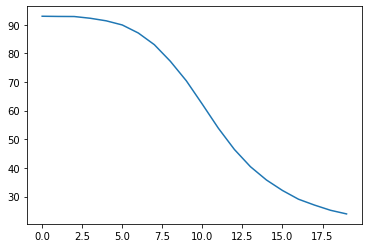

In [153]:
plt.plot(result[0])

In [ ]:
robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))

In [46]:
'''
def accuracy_topk(model, is_train, is_distorted, topk=None, d_type = 'Gaussian', d_val=0):
    set_seed(1)
    print(d_type, d_val)
    #print(device)
    accuracy = 0
    accuracy_topk = []
    count = 0
    y_true=[]
    y_pred=[]
    model.to(device)
    model.eval()
    with torch.no_grad():
        if is_train:
            for images, labels in trainloader:
                count += 1
                images = images.to(device)
                labels = labels.to(device)
                output = model.forward(images)

                ps = torch.exp(output)
                equality = (labels.data == ps.max(dim=1)[1])
                accuracy += equality.type(torch.FloatTensor).mean().item()

        else:
            for images, labels in testloader:
                
                #images = images.to(device)
                #labels = labels.to(device)
                batch_size = labels.size(0)
                #mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                #img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
                #img_std = torch.from_numpy(np.array([0.229, 0.224, 0.225]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)

                if is_distorted:
                    
                    if d_type=='LowPass' or d_type=='HighPass' or d_type=='PhaseJitter':
                        img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
                        img_std = torch.from_numpy(np.array([0.229, 0.224, 0.225]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
                        if d_type=='LowPass':
                            #Use Tensor.cpu() to copy the tensor to host memory first.
                            i_lowpassed = gaussian_filter(images.numpy(), [0, 0, d_val, d_val],
                                                          mode='constant', cval=0.5)
                            images = torch.tensor(i_lowpassed)
                        if d_type=='HighPass':
                            i_lowpassed = gaussian_filter(images.numpy(), [0, 0, d_val, d_val],
                                                          mode='constant', cval=0.5)
                            i_highpassed = images-torch.tensor(i_lowpassed, dtype=torch.float)
                            i_diff = 0.5-i_highpassed.mean(dim=(1, 2, 3), keepdim=True)
                            images = i_highpassed+i_diff
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='PhaseJitter':
                            batch_size, img_size = images.shape[0], images.shape[2]
                            dtheta = (np.random.rand(batch_size, 1, img_size, img_size)-0.5)*2*np.pi*d_val
                            nfreq = img_size//2
                            dtheta[:, 0, 0, 0] = 0
                            dtheta[:, 0, nfreq, nfreq] = np.pi
                            dtheta[:, 0, 0, -1:-nfreq:-1] = -dtheta[:, 0, 0, 1:nfreq]
                            dtheta[:, 0, -1:-nfreq:-1, 0] = -dtheta[:, 0, 1:nfreq, 0]
                            dtheta[:, 0, -1:-nfreq:-1, -1:-2*nfreq:-1] = -dtheta[:, 0, 1:nfreq, 1:2*nfreq]
                            dtheta[:, 0, nfreq, -1:-nfreq:-1] = -dtheta[:, 0, nfreq, 1:nfreq]
                            images = torch.tensor(np.real(ifft2(fft2(images.numpy())*np.exp(1j*dtheta))), dtype=torch.float)
                            images = torch.clamp(images, 0.0, 1.0)
                            
                        images = (images-img_mean)/img_std
                        labels = labels.to(device)
                        images = images.to(device)
                    else:
                        images = images.to(device)
                        labels = labels.to(device)
                        #batch_size = labels.size(0)
                        #mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                        img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor).to(device)
                        img_std = torch.from_numpy(np.array([0.229, 0.224, 0.225]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor).to(device)

                        if d_type=='Gaussian':
                            images += torch.randn_like(images)*d_val
                            #tensor + torch.randn(tensor.size()) * self.std + self.mean
                            #cifar10 image are standardized,thus std=1, mean=0, no need to clamp
                            #when training leNet5, images are in the range of (0.1) not standardized,thus need clamp
                            images = torch.clamp(images, 0.0, 1.0)

                        if d_type=='Uniform':
                            images += (torch.rand_like(images)-0.5)*2*d_val
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='SaltPepper':
                            #print('salte')
                            saltpepper = (torch.rand_like(images)<d_val).to(torch.float)*(2*torch.randint_like(images, 2)-1)
                            images = images+saltpepper
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='Bright':
                            images+=d_val
                            images = torch.clamp(images, 0.0, 1.0)    
                        if d_type=='Dark':
                            images-=d_val
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='GaussianBlur':
                            gaussianblurr = torchvision.transforms.GaussianBlur(2*d_val-1, sigma=d_val)
                            images = gaussianblurr(images)
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='LowContrast':
                            #images = (images-0.5)*(1-d_val)+0.5
                            images = (images -img_mean)*(1-d_val)+img_mean
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='HighContrast':
                            images = (images -img_mean)*(1+d_val)+img_mean
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='NoiseHighContrast':
                            images += torch.randn_like(images)*d_val*0.01
                            images = torch.clamp(images, 0.0, 1.0)
    #                         img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
    #                         img_std = torch.from_numpy(np.array([0.229, 0.224, 0.225]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
                            images = (images -img_mean)*(1+d_val)+img_mean

                            #images = (images -0.5)*(1+d_val)+0.5
                            images = torch.clamp(images, 0.0, 1.0)
                        if d_type=='HighContrastNoise':
    #                         img_mean = torch.from_numpy(np.array([0.485, 0.456, 0.406]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
    #                         img_std = torch.from_numpy(np.array([0.229, 0.224, 0.225]*batch_size).reshape(batch_size,3,1,1)).type(torch.FloatTensor)
                            images = (images -img_mean)*(1+d_val)+img_mean

                            #images = (images -0.5)*(1+d_val)+0.5
                            images = torch.clamp(images, 0.0, 1.0)
                            images += torch.randn_like(images)*d_val*0.01
                            images = torch.clamp(images, 0.0, 1.0)

                        if d_type=='LowPassNoise':
                            i_noise = gaussian_filter(np.random.randn(*images.shape), [0, 0, 1.5, 1.5],
                                                      mode='constant', cval=0.)
                            i_noise = torch.tensor(i_noise*d_val, dtype=torch.float).to(device)
                            images += i_noise
                            images = torch.clamp(images, 0.0, 1.0)
                            
                        images = (images-img_mean)/img_std
                
                    #rescale images pixel to range 0, 1
#                     images = images.view(batch_size,3,-1)
#                     images -= images.min(2, keepdim=True)[0]
#                     images /= images.max(2, keepdim=True)[0]
#                     images = images.view(batch_size, 3, 32, 32)
                
#                 images = images.to(device)
#                 img_mean.to(device)
#                 img_std.to(device)
#                 labels = labels.to(device)
#                 images = images.to(device)
#                 images = (images-img_mean)/img_std
#                 labels = labels.to(device)
#                 images = images.to(device)
               
            
                count += 1
                #output = model.forward(images)
                output, _ = model(images)
#                 ps = torch.exp(output)
#                 #print(labels.data)
#                 #print(ps.max(dim=1).indices)
#                 y_true.append(labels.data)
#                 y_pred.append(ps.max(dim=1).indices)


                if topk == None:
                    ps = torch.exp(output)
                    equality = (labels.data == ps.max(dim=1)[1])
                    accuracy += equality.type(torch.FloatTensor).mean().item()
                else:
                    maxk = max(topk)
                    batch_size = labels.size(0)
                    _, pred = torch.topk(output, maxk, dim=1, largest=True, sorted=True)
                    pred = pred.t()

                    correct = pred.eq(labels.view(1, -1).expand_as(pred))
                    
                    res = []
                    for k in topk:
                        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                        res.append((correct_k.mul_(100.0 / batch_size)).item())
                    accuracy_topk.append(res)
                    #return np.mean(accuracy_topk, 0)
                    #print(accuracy_topk)
                        
                    
    if topk==None:
        return accuracy/count
    else:
        return np.mean(accuracy_topk, 0)
    #return accuracy/count
'''

In [52]:
gaussian_dvals=[i*0.01 for i in range(31)]

In [53]:
gaussian_dvals

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3]

In [54]:
#gaussian with clamp
robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3


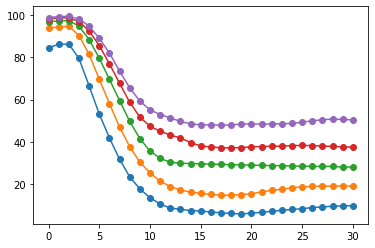

In [55]:
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

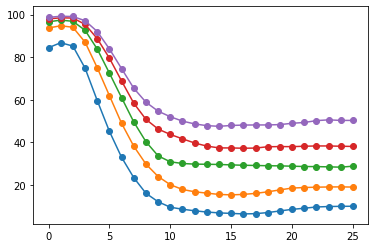

In [48]:
#uniform with clamp
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

In [49]:
#gaussian with clamp
robust_result = robust_test_topk(net,'Gaussian',uniform_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()

cuda:3
Gaussian 0.0
Gaussian 0.02
Gaussian 0.04
Gaussian 0.06
Gaussian 0.08
Gaussian 0.1
Gaussian 0.12
Gaussian 0.14
Gaussian 0.16
Gaussian 0.18
Gaussian 0.2
Gaussian 0.22
Gaussian 0.24
Gaussian 0.26
Gaussian 0.28
Gaussian 0.3
Gaussian 0.32
Gaussian 0.34
Gaussian 0.36
Gaussian 0.38
Gaussian 0.4
Gaussian 0.42
Gaussian 0.44
Gaussian 0.46
Gaussian 0.48
Gaussian 0.5


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

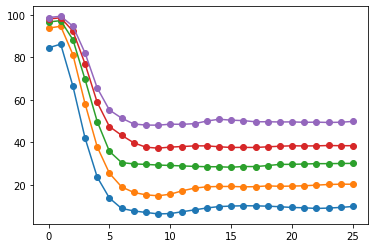

In [50]:
#gaussian with clamp
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

In [47]:
#uniform with clamp
robust_result = robust_test_topk(net,'Uniform',uniform_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()

cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5


cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5


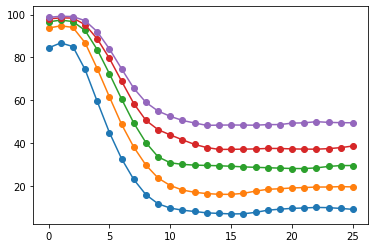

In [36]:
#uniform without clamp
robust_result = robust_test_topk(net,'Uniform',uniform_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

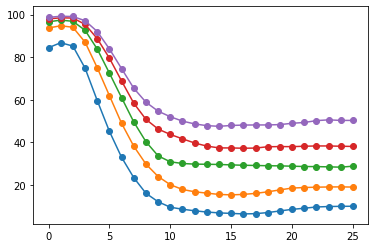

In [34]:
#uniform with clamp
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

In [32]:
robust_result = robust_test_topk(net,'Uniform',uniform_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()

cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5


In [7]:
# def robust_test_topk(net, d_type, d_val_list, topk=None):
#     set_seed(1)
#     test_acc = []
#     print(device)
#     net.to(device)
#     for d_val in d_val_list:
# #         if topk==None:
# #             acc = accuracy_topk(net, False, True, topk, d_type, d_val)
# #         else:
#         acc = accuracy_topk(net, False, True, topk, d_type, d_val)
#         test_acc.append(acc)
#         #print("Test distort val:", 0.03*lv, acc )
#     return test_acc

In [10]:
def model_RDM_all(net, stimuli_set):
    set_seed(1)
    arr = np.zeros((5,92,92))
    net.eval()
    with torch.no_grad():
        for i in range(92):
            for j in range(i+1,92):
                scores = net.feature_distance_all(stimuli_set[i], stimuli_set[j])
                for l in range(5):
                    arr[l][i][j] = scores[l].item()
                    arr[l][j][i] = arr[l][i][j]
        return arr

In [11]:
def model_RDM(net, layer_num, stimuli_set):
    return model_RDM_all(net, stimuli_set)[layer_num]

In [ ]:
path = f'./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch{i}_luffycuda:4.pt'
    print(path)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))

In [166]:
import os

In [170]:
fn_list = [fn for fn in os.listdir("./state_dict_from_home/layer2")]
fn_list.sort()

In [176]:
fn_list

['resnet_humanEV_layer2_b20_seed136.pt',
 'resnet_humanEV_layer2_b20_seed15.pt',
 'resnet_humanEV_layer2_b20_seed191.pt',
 'resnet_humanEV_layer2_b20_seed60.pt',
 'resnet_humanEV_layer2_b20_seed8.pt',
 'resnet_humanEV_layer2_b20_seed97.pt',
 'resnet_humanIT_layer2_b20_seed136.pt',
 'resnet_humanIT_layer2_b20_seed15.pt',
 'resnet_humanIT_layer2_b20_seed191.pt',
 'resnet_humanIT_layer2_b20_seed209.pt',
 'resnet_humanIT_layer2_b20_seed392.pt',
 'resnet_humanIT_layer2_b20_seed558.pt',
 'resnet_humanIT_layer2_b20_seed60.pt',
 'resnet_humanIT_layer2_b20_seed8.pt',
 'resnet_humanIT_layer2_b20_seed829.pt',
 'resnet_humanIT_layer2_b20_seed904.pt',
 'resnet_humanIT_layer2_b20_seed963.pt',
 'resnet_humanIT_layer2_b20_seed97.pt',
 'resnet_humanIT_layer2_b2_seed8.pt',
 'resnet_humanIT_neg_layer2_b20_seed136.pt',
 'resnet_humanIT_neg_layer2_b20_seed15.pt',
 'resnet_humanIT_neg_layer2_b20_seed191.pt',
 'resnet_humanIT_neg_layer2_b20_seed209.pt',
 'resnet_humanIT_neg_layer2_b20_seed392.pt',
 'resnet_h

In [24]:
seed_list1 = [8, 15, 60, 97, 136, 191]

./state_dict_from_home/layer2/resnet_humanIT_layer2_b20_seed8.pt


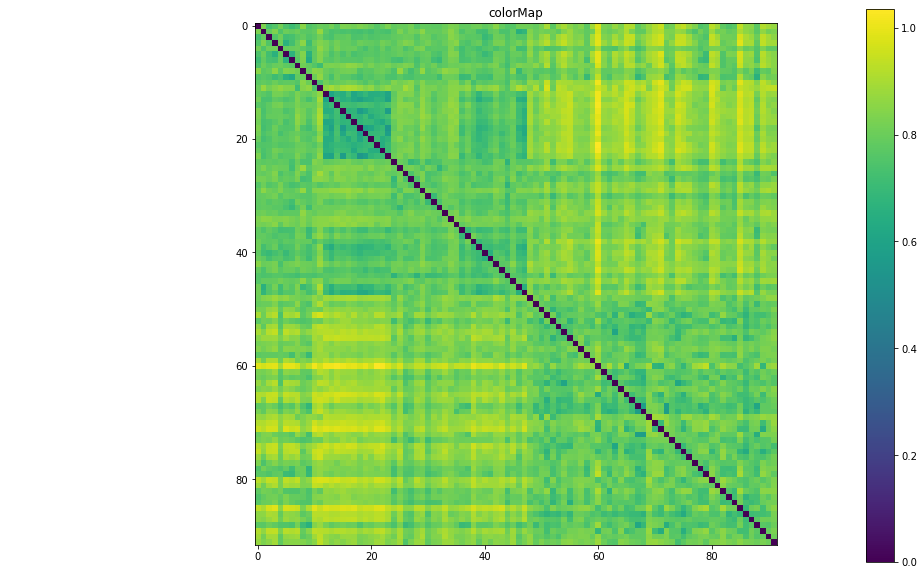

./state_dict_from_home/layer2/resnet_humanIT_neg_layer2_b20_seed8.pt


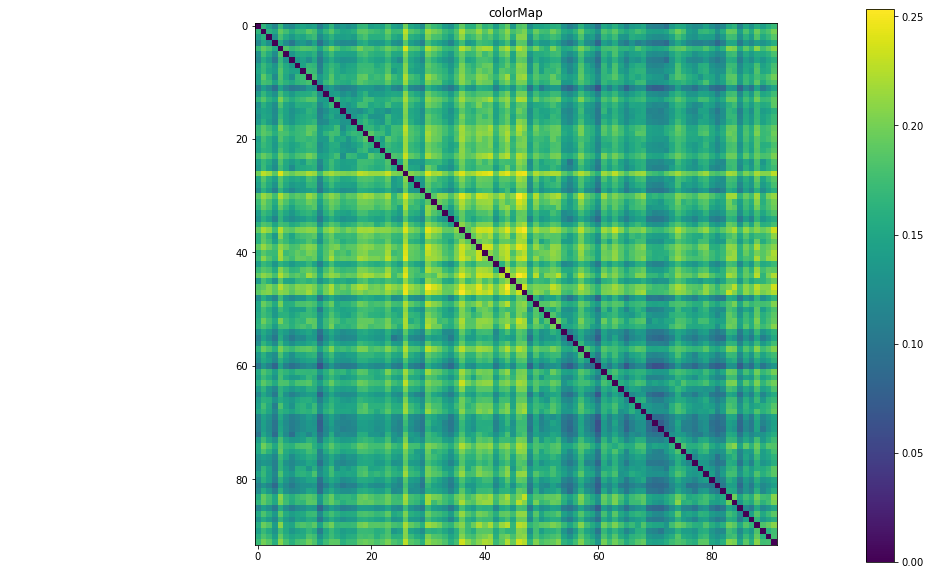

./state_dict_from_home/layer2/resnet_randn_layer2_b20_seed8.pt


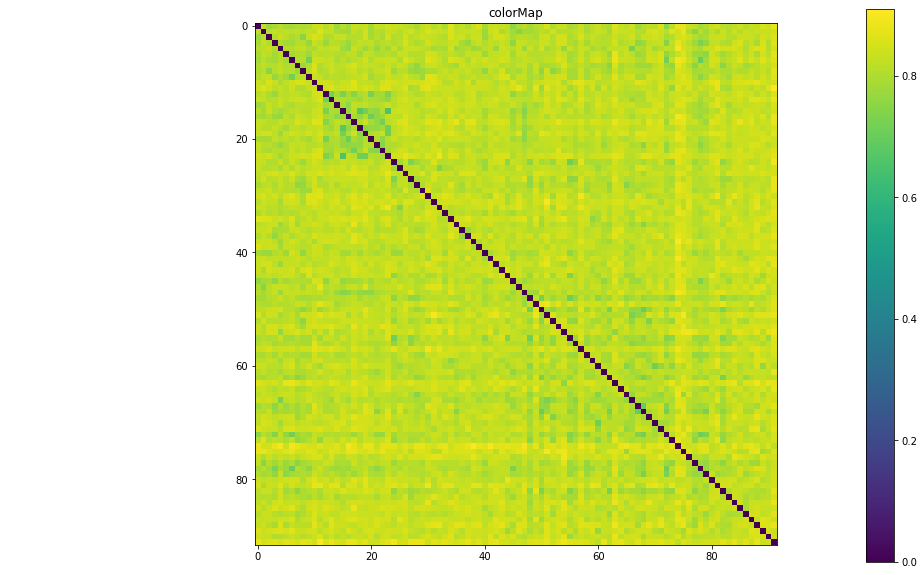

./state_dict_from_home/layer2/resnet_humanEV_layer2_b20_seed8.pt


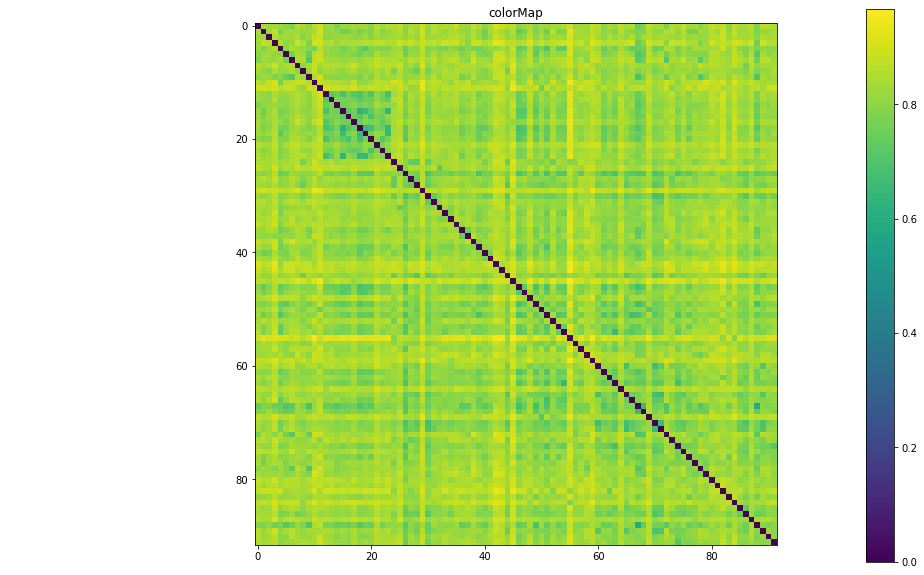

In [178]:
for rdm in ['humanIT_layer2_b20','humanIT_neg_layer2_b20', 'randn_layer2_b20', 'humanEV_layer2_b20']: #'randn_mean_b2',
    per_rdm=[]
    path = './state_dict_from_home/layer2/resnet_'+rdm+'_seed8.pt'
    print(path)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    net.to(device)
    arr = model_RDM(net, 2, stimuli_set)
    colorMap(arr)

In [180]:
resnet_layer2_robust_lowcontrast_home=[] #layer4_robust_gaussian_humanIT_b2_seed8.npy
for rdm in ['humanIT_layer2_b20','humanIT_neg_layer2_b20', 'randn_layer2_b20', 'humanEV_layer2_b20']: #'randn_mean_b2',
    per_rdm=[]
    for seed in seed_list1:
        path = './state_dict_from_home/layer2/resnet_'+rdm+'_seed'+str(seed)+'.pt'
        print(path)
        net = myResnet18()
        net.load_state_dict(torch.load(path, map_location=device))
        robust_result = robust_test_topk(net,'LowContrast',lowcontrast_dvals, (1,2,3,4,5))
        robust_result = np.array(robust_result).transpose()
        per_rdm.append(robust_result)
    resnet_layer2_robust_lowcontrast_home.append(per_rdm)

./state_dict_from_home/layer2/resnet_humanIT_layer2_b20_seed8.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
./state_dict_from_home/layer2/resnet_humanIT_layer2_b20_seed15.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowCont

LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
./state_dict_from_home/layer2/resnet_humanIT_neg_layer2_b20_seed191.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.940000000000

LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
./state_dict_from_home/layer2/resnet_humanEV_layer2_b20_seed136.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast

In [181]:
    
resnet_layer2_robust_lowcontrast_home = np.array(resnet_layer2_robust_lowcontrast_home)
filename = './state_dict_from_home/layer2/resnet18_layer2_robust_lowcontrast_home.npy'
np.save(filename, resnet_layer2_robust_lowcontrast_home)

In [174]:
len(lowcontrast_dvals)

39

In [58]:
gaussian_dvals

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3]

In [59]:
uniform_dvals

[0.0,
 0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5]

In [60]:
highcontrast_dvals

[0.0,
 0.2,
 0.4,
 0.6,
 0.8,
 1.0,
 1.2544000000000002,
 1.4049280000000004,
 1.5735193600000006,
 1.7623416832000007,
 1.973822685184001,
 2.2106814074060814,
 2.4759631762948113,
 2.773078757450189,
 3.105848208344212,
 3.478549993345518,
 3.8959759925469806,
 4.363493111652619,
 4.887112285050933,
 5.4735657592570455,
 6.130393650367892,
 6.866040888412039,
 7.689965795021485,
 8.612761690424064,
 9.646293093274952,
 10.803848264467948,
 12.100310056204103,
 13.552347262948595,
 15.178628934502429,
 17.00006440664272,
 19.04007213543985,
 21.324880791692635,
 23.883866486695755,
 26.749930465099247,
 29.95992212091116]

In [61]:
lowcontrast_dvals

[0.0,
 0.04,
 0.08,
 0.12,
 0.16,
 0.2,
 0.24,
 0.28,
 0.32,
 0.36,
 0.4,
 0.44,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7000000000000001,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.8200000000000001,
 0.84,
 0.86,
 0.88,
 0.9,
 0.92,
 0.9400000000000001,
 0.96,
 0.98,
 1.0]

In [62]:
gaussianblur_dvals

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# test added image distortion trained resnet

In [64]:
start = time.time()
resnet_add_None=[]
path = f'./resnet/resnet18_train_add_None_distortion_seed8_epoch40_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
for d in [('Gaussian', gaussian_dvals),('Uniform', uniform_dvals),('HighContrast', highcontrast_dvals),
               ('LowContrast', lowcontrast_dvals),('GaussianBlur', gaussianblur_dvals)]:
    robust_result = robust_test_topk(net,d[0],d[1], (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    resnet_add_None.append(robust_result)
stop = time.time()
print('used',(stop-start)/60,'min')

./resnet/resnet18_train_add_None_distortion_seed8_epoch40_luffycuda:4.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContra

In [68]:
start = time.time()
resnet_add_gaussian=[]
path = f'./resnet/resnet18_train_add_Gaussian_distortion_seed8_epoch40_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
for d in [('Gaussian', gaussian_dvals),('Uniform', uniform_dvals),('HighContrast', highcontrast_dvals),
               ('LowContrast', lowcontrast_dvals),('GaussianBlur', gaussianblur_dvals)]:
    robust_result = robust_test_topk(net,d[0],d[1], (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    resnet_add_gaussian.append(robust_result)
stop = time.time()
print('used',(stop-start)/60,'min')


./resnet/resnet18_train_add_Gaussian_distortion_seed8_epoch40_luffycuda:4.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighCo

In [95]:
start = time.time()
resnet_add_highcontrast=[]
path = f'./resnet/resnet18_train_add_HighContrast_distortion_seed8_epoch40_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
for d in [('Gaussian', gaussian_dvals),('Uniform', uniform_dvals),('HighContrast', highcontrast_dvals),
               ('LowContrast', lowcontrast_dvals),('GaussianBlur', gaussianblur_dvals)]:
    robust_result = robust_test_topk(net,d[0],d[1], (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    resnet_add_highcontrast.append(robust_result)
stop = time.time()
print('used',(stop-start)/60,'min')


./resnet/resnet18_train_add_HighContrast_distortion_seed8_epoch40_luffycuda:4.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
Hi

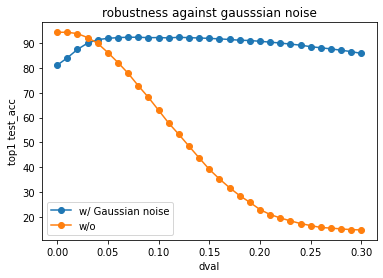

In [119]:

plt.plot(gaussian_dvals,resnet_add_gaussian[0][0],'o-')
plt.plot(gaussian_dvals,resnet_add_None[0][0],'o-')
plt.title('robustness against gausssian noise')
plt.xlabel('dval')
plt.ylabel('top1 test_acc')
plt.legend(['w/ Gaussian noise','w/o'])

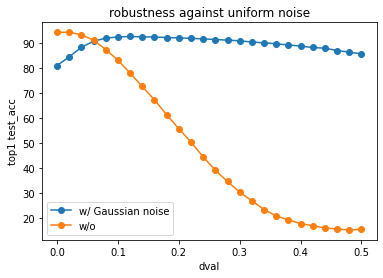

In [120]:
plt.plot(uniform_dvals,resnet_add_gaussian[1][0],'o-')
plt.plot(uniform_dvals,resnet_add_None[1][0],'o-')
plt.title('robustness against uniform noise')
plt.xlabel('dval')
plt.ylabel('top1 test_acc')
plt.legend(['w/ Gaussian noise','w/o'])

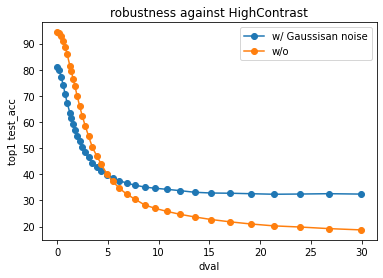

In [122]:
plt.plot(highcontrast_dvals,resnet_add_gaussian[2][0],'o-')
plt.plot(highcontrast_dvals,resnet_add_None[2][0],'o-')
plt.title('robustness against HighContrast')
plt.xlabel('dval')
plt.ylabel('top1 test_acc')
plt.legend(['w/ Gaussisan noise','w/o'])

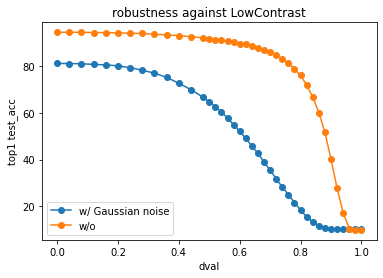

In [123]:
plt.plot(lowcontrast_dvals,resnet_add_gaussian[3][0],'o-')
plt.plot(lowcontrast_dvals,resnet_add_None[3][0],'o-')
plt.title('robustness against LowContrast')
plt.xlabel('dval')
plt.ylabel('top1 test_acc')
plt.legend(['w/ Gaussian noise','w/o'])

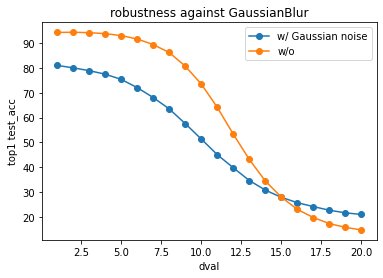

In [124]:
plt.plot(gaussianblur_dvals,resnet_add_gaussian[4][0],'o-')
plt.plot(gaussianblur_dvals,resnet_add_None[4][0],'o-')
plt.title('robustness against GaussianBlur')
plt.xlabel('dval')
plt.ylabel('top1 test_acc')
plt.legend(['w/ Gaussian noise','w/o'])

In [106]:
start = time.time()
resnet_add_blur=[]
path = f'./resnet/resnet18_train_add_GaussianBlur_distortion_seed8_epoch40_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
for d in [('Gaussian', gaussian_dvals),('Uniform', uniform_dvals),('HighContrast', highcontrast_dvals),
               ('LowContrast', lowcontrast_dvals),('GaussianBlur', gaussianblur_dvals)]:
    robust_result = robust_test_topk(net,d[0],d[1], (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    resnet_add_blur.append(robust_result)
stop = time.time()
print('used',(stop-start)/60,'min')

./resnet/resnet18_train_add_GaussianBlur_distortion_seed8_epoch40_luffycuda:4.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
Hi

In [107]:
start = time.time()
resnet_add_lowcontrast=[]
path = f'./resnet/resnet18_train_add_LowContrast_distortion_seed8_epoch40_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
for d in [('Gaussian', gaussian_dvals),('Uniform', uniform_dvals),('HighContrast', highcontrast_dvals),
               ('LowContrast', lowcontrast_dvals),('GaussianBlur', gaussianblur_dvals)]:
    robust_result = robust_test_topk(net,d[0],d[1], (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    resnet_add_lowcontrast.append(robust_result)
stop = time.time()
print('used',(stop-start)/60,'min')

./resnet/resnet18_train_add_LowContrast_distortion_seed8_epoch40_luffycuda:4.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
Hig

# layer2

### gaussian blur

In [22]:
gaussianblur_dvals = [i for i in range(1,21)]
gaussianblur_dvals

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

./state_dict/resnet18_layer2_humanIT_bNone_seed8_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 20
GaussianBlur 21
GaussianBlur 22
GaussianBlur 23
GaussianBlur 24
GaussianBlur 25
GaussianBlur 26
GaussianBlur 27
GaussianBlur 28
GaussianBlur 29
GaussianBlur 30
GaussianBlur 31
GaussianBlur 32
GaussianBlur 33
GaussianBlur 34
GaussianBlur 35
GaussianBlur 36
GaussianBlur 37
GaussianBlur 38
GaussianBlur 39
used 4.939306326707205 min


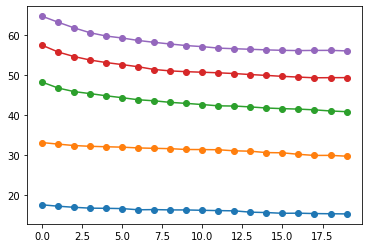

In [62]:
start = time.time()
path = f'./state_dict/resnet18_layer2_humanIT_bNone_seed8_epoch10_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
robust_result = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()
stop = time.time()
print('used',(stop-start)/60,'min')

plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

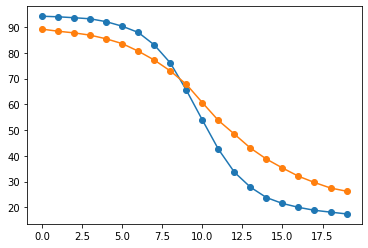

In [61]:
plt.plot(robust_result[0],'o-')
#plt.plot(robust_result[1],'o-')
#plt.plot(robust_result[2],'o-')
# plt.plot(robust_result[3],'o-')
# plt.plot(robust_result[4],'o-')

plt.plot(robust_result_IT[0],'o-')
#plt.plot(robust_result_IT[1],'o-')
#plt.plot(robust_result_IT[2],'o-')
# plt.plot(robust_result_IT[3],'o-')
# plt.plot(robust_result_IT[4],'o-')

./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 20
GaussianBlur 21
GaussianBlur 22
GaussianBlur 23
GaussianBlur 24
GaussianBlur 25
GaussianBlur 26
GaussianBlur 27
GaussianBlur 28
GaussianBlur 29
GaussianBlur 30
GaussianBlur 31
GaussianBlur 32
GaussianBlur 33
GaussianBlur 34
GaussianBlur 35
GaussianBlur 36
GaussianBlur 37
GaussianBlur 38
GaussianBlur 39
used 5.067625923951467 min


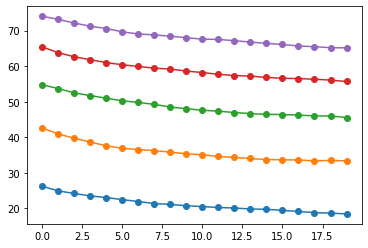

In [63]:
start = time.time()
path = f'./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
robust_result_IT = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
robust_result_IT = np.array(robust_result_IT).transpose()
stop = time.time()
print('used',(stop-start)/60,'min')

plt.plot(robust_result_IT[0],'o-')
plt.plot(robust_result_IT[1],'o-')
plt.plot(robust_result_IT[2],'o-')
plt.plot(robust_result_IT[3],'o-')
plt.plot(robust_result_IT[4],'o-')

./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
used 2.3322421511014304 min


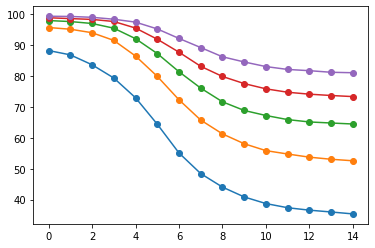

In [41]:
start = time.time()
path = f'./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
robust_result = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()
stop = time.time()
print('used',(stop-start)/60,'min')

plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

In [37]:
start = time.time()
path = f'./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
robust_result = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()
stop = time.time()
print('used',(stop-start)/60,'min')

./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 0.5
GaussianBlur 1.0
GaussianBlur 1.5
GaussianBlur 2.0
GaussianBlur 2.5
GaussianBlur 3.0
GaussianBlur 3.5
GaussianBlur 4.0
GaussianBlur 4.5
GaussianBlur 5.0
GaussianBlur 5.5
GaussianBlur 6.0
GaussianBlur 6.5
GaussianBlur 7.0
GaussianBlur 7.5
GaussianBlur 8.0
GaussianBlur 8.5
GaussianBlur 9.0
GaussianBlur 9.5
GaussianBlur 10.0
GaussianBlur 10.5
GaussianBlur 11.0
GaussianBlur 11.5
GaussianBlur 12.0
GaussianBlur 12.5
GaussianBlur 13.0
GaussianBlur 13.5
GaussianBlur 14.0
GaussianBlur 14.5
GaussianBlur 15.0
used 4.106418069203695 min


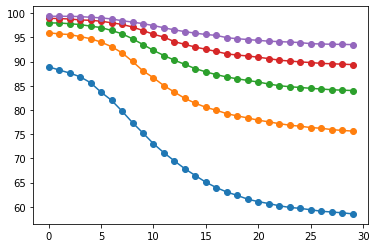

In [38]:
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

In [33]:
start = time.time()
path = f'./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt'
print(path)
net = myResnet18()
net.load_state_dict(torch.load(path, map_location=device))
robust_result = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()
stop = time.time()
print('used',(stop-start)/60,'min')

./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
used 2.1318942109743753 min


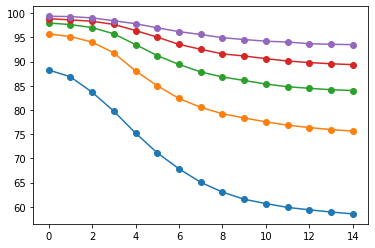

In [35]:
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')
plt.plot(robust_result[4],'o-')

In [13]:
lowcontrast_dvals = [i*0.04 for i in range(12)]+[i*0.02 for i in range(24,51)]
print(len(lowcontrast_dvals))

39


In [117]:
start = time.time()
layer2_humanIT_b20_robust_lowcontrast_list=[]
for epoch in []:
    per_epoch=[]
for rdm in []:
    per_rdm=[]
    }
end = time.time()
print('time used:', (end-start)/60, 'min')

./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch1_luffycuda:4.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch2_luffycuda:4.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0

In [120]:
import seaborn as sns

In [186]:
resnet18_layer2_humanIT_neg_b20.0_seed191_epoch3_luffycuda:4.pt
resnet18_layer2_humanEV_b20.0_seed8_epoch3_luffycuda:4.pt
resnet18_layer2_humanIT_b0_seed8_epoch1_luffycuda:4.pt
resnet18_layer2_humanIT_b20.0_seed15_epoch8_luffycuda:4.pt
resnet18_layer2_humanIT_bNone_seed8_epoch1_luffycuda:4.pt
resnet18_layer2_randn_b20.0_seed8_epoch1_luffycuda:4.pt

10
9
8
7
6
5
4
3
2
1


# layer 3 third, every epoch

# Gaussian noise

In [8]:
gaussian_dvals=[i*0.01 for i in range(31)]

In [9]:
seed_list2=[209, 392, 558, 829, 904, 963]

In [10]:
#resnet18_layer3_humanEV_b2.0_seed209_epoch3_luffycuda:5.pt

In [ ]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    robust_per_epoch=[]
    y_pred_per_epoch=[]
    for rdm in ['humanIT_b2.0','humanIT_b0','humanIT_neg_b2.0','randn_b2.0','humanEV_b2.0','humanIT_bNone']:
        print("rdm", rdm)
        robust_per_rdm=[]
        y_pred_per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer3_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = create_myResnet18(True)
            net.load_state_dict(torch.load(path, map_location=device))
            y_pred_list, test_acc_list= robust_test_topk(net, testloader, device, 'Gaussian',gaussian_dvals, (1,2,3,4,5))
            robust_result = np.array(test_acc_list).transpose()
            robust_per_rdm.append(robust_result)
            y_pred_per_rdm.append(y_pred_list)
        robust_per_epoch.append(robust_per_rdm)
        y_pred_per_epoch.append(y_pred_per_rdm)
        
    robust_per_epoch = np.array(robust_per_epoch)
    y_pred_per_epoch = np.array(y_pred_per_epoch)
    filename = f'./robust/resnet18_layer3/resnet18_layer3_robust_gaussian_epoch{epoch}_seedlist2.npy'
    np.save(filename, robust_per_epoch)
    filename = f'./robust/resnet18_layer3/resnet18_layer3_y_pred_gaussian_epoch{epoch}_seedlist2.npy'
    np.save(filename, y_pred_per_epoch)

epoch: 10
rdm humanIT_b2.0
seed 209
./state_dict/resnet18_layer3_humanIT_b2.0_seed209_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer3_humanIT_b2.0_seed392_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaus

Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed904_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed963_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0

Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer3_humanIT_bNone_seed558_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer3_humanIT_bNone_seed829_epoch10_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Ga

Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanIT_neg_b2.0
seed 209
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed209_epoch9_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed392_epoch9_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaus

Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer3_humanEV_b2.0_seed904_epoch9_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer3_humanEV_b2.0_seed963_epoch9_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussi

Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer3_humanIT_b0_seed558_epoch8_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer3_humanIT_b0_seed829_epoch8_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0

Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanEV_b2.0
seed 209
./state_dict/resnet18_layer3_humanEV_b2.0_seed209_epoch8_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer3_humanEV_b2.0_seed392_epoch8_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gau

Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer3_humanIT_b2.0_seed904_epoch7_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer3_humanIT_b2.0_seed963_epoch7_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussi

Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer3_randn_b2.0_seed558_epoch7_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer3_randn_b2.0_seed829_epoch7_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0

Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch: 6
rdm humanIT_b2.0
seed 209
./state_dict/resnet18_layer3_humanIT_b2.0_seed209_epoch6_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer3_humanIT_b2.0_seed392_epoch6_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian

Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed904_epoch6_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed963_epoch6_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.0

Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer3_humanIT_bNone_seed558_epoch6_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer3_humanIT_bNone_seed829_epoch6_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaus

Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanIT_neg_b2.0
seed 209
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed209_epoch5_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer3_humanIT_neg_b2.0_seed392_epoch5_luffy

Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer3_humanEV_b2.0_seed904_epoch5_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer3_humanEV_b2.0_seed963_

Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer3_humanIT_b0_seed558_epoch4_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer3_humanIT_b0_seed829_epoc

Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanEV_b2.0
seed 209
./state_dict/resnet18_layer3_humanEV_b2.0_seed209_epoch4_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer3_huma

Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer3_humanIT_b2.0_seed904_epoch3_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer3_humanIT_b2.0_seed963_

Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer3_randn_b2.0_seed558_epoch3_luffycuda:5.pt
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer3_randn_b2.0_seed829_epoc

In [ ]:
model_ft = models.resnet18(pretrained=use_pretrained)

In [53]:
# class myResnet18(torch.nn.Module):
#     def __init__(self, use_Pretrained):
#         super(myResnet18, self).__init__()
#         self.net = torchvision.models.resnet18(pretrained=use_Pretrained)
#         #in_features = pretrained_resnet18.fc.in_features, for resnet18 it is 512
#         self.net.fc = torch.nn.Linear(in_features=512, out_features=10, bias=True)
#         self.layer_weight = torch.nn.Parameter(torch.ones(5, dtype=torch.float)) 
        
#     def forward(self, x):
#         x0 = self.net.maxpool(self.net.relu(self.net.bn1(self.net.conv1(x))))
#         x1 = self.net.layer1(x0) 
#         x2 = self.net.layer2(x1)
#         x3 = self.net.layer3(x2)
#         x4 = self.net.layer4(x3)
#         out = self.net.avgpool(x4)
#         batch_size = out.size()[0] 
#         out = out.view(batch_size, -1)
#         out = self.net.fc(out)
#         features = [x0, x1, x2, x3, x4]
#         #print("\tIn Model: input size", x.size(),"output size", out.size())
#         return out, features

#     def feature_distance_all(self, xi, xj):
#         '''
#         xi: batch of image tensors (batch, C, W, H)
#         xj: batch of image tensors (batch, C, W, H)   
#         return the list of feature distance(layer0, 1, 2, 3, 4)
#         '''
#         assert xi.shape == xj.shape
#         batch_size = xi.shape[0]
#         _, xi_features= self.forward(xi)
#         _, xj_features = self.forward(xj)
    
#         distance_list = []
#         for idx in range(len(xi_features)):
#             scores = torch.stack([1- pearsonr_torch(f_i.flatten(), f_j.flatten())\
#                                   for i, (f_i, f_j) in enumerate(zip(xi_features[idx], xj_features[idx]))] \
#                                   ,dim=0)
#             distance_list.append(scores)
#         return distance_list
    
#     def feature_distance(self, xi, xj, layer_num=None):
    
#         s_list = self.feature_distance_all(xi, xj)
#         score = None 
        
#         if layer_num==None:
#             '''
#             all layers, adaptive learnable layer weight
#             '''
#             #score = (torch.stack(s_list, dim = 1)*self.layer_weight).sum(dim=1)
#             score = (torch.stack(s_list, dim = 1)*F.softmax(self.layer_weight,dim=0)).sum(dim=1) #learnable weight
#         else:
#             #feature distances for individual layers
#             score = s_list[layer_num]
          
#         return score


In [20]:
# from sklearn.preprocessing import normalize
# from scipy.spatial.distance import pdist, squareform
# from scipy.stats import spearmanr

# def unwrap_square_form(sq_form_matrix):
#     return squareform(sq_form_matrix)

# def compute_rdm_correlation(model_rdm,human_rdm):
#     model = unwrap_square_form(model_rdm)
#     human = unwrap_square_form(human_rdm)
#     corr, pval = spearmanr(model,human)
#     return corr, pval

In [35]:
# import seaborn as sns

# def model_RDM_all(net, num_of_layers, stimuli_set):
#     set_seed(1)
#     arr = np.zeros((num_of_layers,92,92))
#     net.eval()
#     with torch.no_grad():
#         for i in range(92):
#             for j in range(i+1,92):
#                 scores = net.feature_distance_all(stimuli_set[i], stimuli_set[j])
#                 for l in range(num_of_layers):
#                     arr[l][i][j] = scores[l].item()
#                     arr[l][j][i] = arr[l][i][j]
#         return arr

# def plot_all_RDMs(net, num_of_layers, stimuli_set, humanIT_rdm):
#     rdm_all = model_RDM_all(net, num_of_layers, stimuli_set)
#     HMS_all = []
#     fig, axes = plt.subplots(1, num_of_layers,figsize=(5*num_of_layers,5))
#     for i in range(num_of_layers):
#         HMS = compute_rdm_correlation(rdm_all[i], humanIT_rdm)
#         HMS_all.append(HMS)
#         print('layer',i, 'HMS:', HMS)
#         sns.heatmap(ax=axes[i],data=rdm_all[i],cmap="viridis",center=0, square = True,  xticklabels=12, yticklabels=12)
#         title = f'HMS: {HMS[0]:.4f}'
#         axes[i].set_title(title)
#     plt.show()
#     return rdm_all, HMS_all

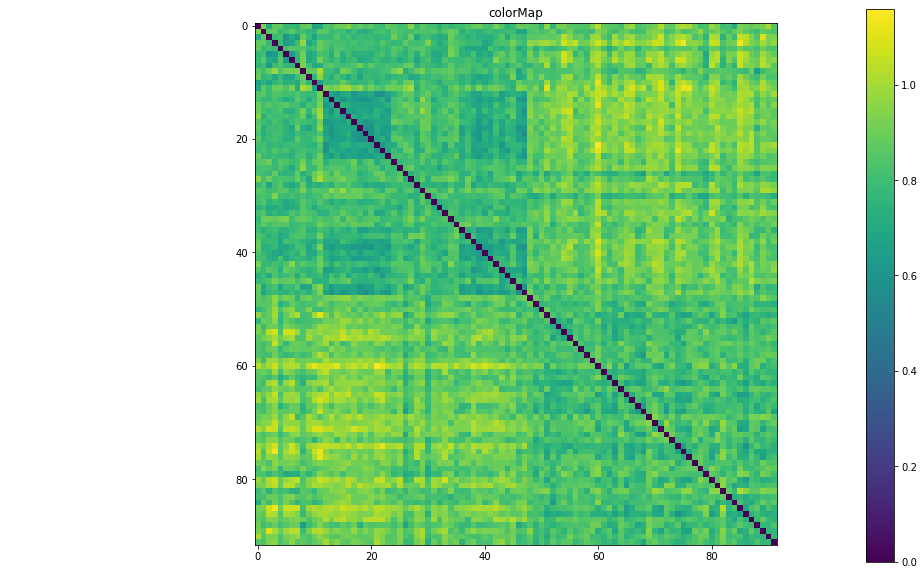

The max value of hum_rdm is: 1.1586544513702393
The min value of hum_rdm is: 0.0


In [31]:
humanIT_rdm = np.loadtxt('./RDM/humanIT_rdm_from_Kriegeskorte_mat.csv', delimiter=',')
colorMap(humanIT_rdm)
print("The max value of hum_rdm is:", humanIT_rdm.max())
print("The min value of hum_rdm is:", humanIT_rdm.min())

In [54]:
net = myResnet18(True)

In [8]:
net2 = create_myResnet18(True)

In [10]:
for param in net2.parameters():
    print(param.data)

tensor([1., 1., 1., 1., 1.])
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.24

In [45]:
net.net.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

layer 0 HMS: (0.06735330583448185, 1.292543977612707e-05)
layer 1 HMS: (0.10026006475574104, 7.967900439769304e-11)
layer 2 HMS: (0.10934350957031916, 1.3065437204605068e-12)
layer 3 HMS: (0.09991168674497204, 9.263808711581105e-11)
layer 4 HMS: (0.09203906511306927, 2.435115337438179e-09)


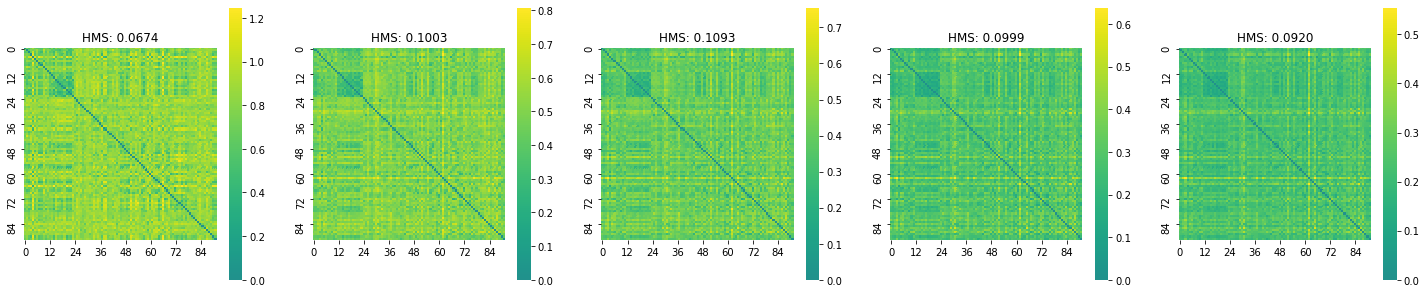

(array([[[0.        , 0.73152208, 0.53508902, ..., 0.84677815,
          0.73185849, 0.66470373],
         [0.73152208, 0.        , 0.60074818, ..., 0.85954046,
          0.83597821, 0.81112647],
         [0.53508902, 0.60074818, 0.        , ..., 0.85612696,
          0.63472939, 0.58416319],
         ...,
         [0.84677815, 0.85954046, 0.85612696, ..., 0.        ,
          0.78846484, 0.84622979],
         [0.73185849, 0.83597821, 0.63472939, ..., 0.78846484,
          0.        , 0.63342249],
         [0.66470373, 0.81112647, 0.58416319, ..., 0.84622979,
          0.63342249, 0.        ]],
 
        [[0.        , 0.3971501 , 0.38001871, ..., 0.52393055,
          0.43479645, 0.43988597],
         [0.3971501 , 0.        , 0.3837285 , ..., 0.49183822,
          0.40562642, 0.44454116],
         [0.38001871, 0.3837285 , 0.        , ..., 0.54057664,
          0.38479155, 0.41677332],
         ...,
         [0.52393055, 0.49183822, 0.54057664, ..., 0.        ,
          0.47774655, 0.

In [41]:
net_no_pretrain_2 = myResnet18(False)
net_no_pretrain_2.to(device)
plot_all_RDMs(net_no_pretrain_2, 5, stimuli_set, humanIT_rdm)

In [38]:
net_no_pretrain = myResnet18(False)

layer 0 HMS: (0.050428175755207104, 0.0010994037131347605)
layer 1 HMS: (0.07530361430005694, 1.074047011611507e-06)
layer 2 HMS: (0.09109560044398984, 3.5405925843240507e-09)
layer 3 HMS: (0.08151003603370685, 1.285815664694442e-07)
layer 4 HMS: (0.0643301325705817, 3.110983357176699e-05)


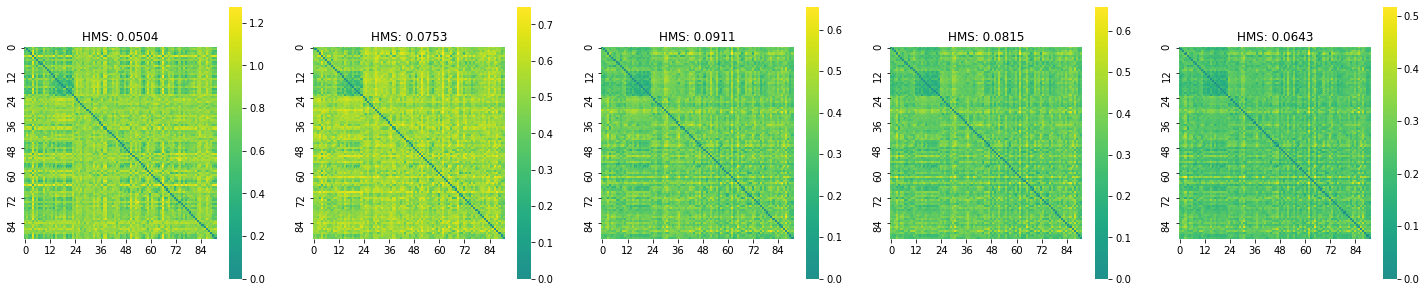

(array([[[0.        , 0.74032557, 0.52232713, ..., 0.82312304,
          0.64588988, 0.57738459],
         [0.74032557, 0.        , 0.60359156, ..., 0.85333866,
          0.76423365, 0.7603972 ],
         [0.52232713, 0.60359156, 0.        , ..., 0.8248626 ,
          0.5460875 , 0.50821322],
         ...,
         [0.82312304, 0.85333866, 0.8248626 , ..., 0.        ,
          0.76593381, 0.82543594],
         [0.64588988, 0.76423365, 0.5460875 , ..., 0.76593381,
          0.        , 0.56562972],
         [0.57738459, 0.7603972 , 0.50821322, ..., 0.82543594,
          0.56562972, 0.        ]],
 
        [[0.        , 0.473418  , 0.4469682 , ..., 0.51295388,
          0.42520696, 0.40787655],
         [0.473418  , 0.        , 0.44661039, ..., 0.51177692,
          0.43267971, 0.47963506],
         [0.4469682 , 0.44661039, 0.        , ..., 0.53912294,
          0.37543637, 0.41222084],
         ...,
         [0.51295388, 0.51177692, 0.53912294, ..., 0.        ,
          0.45794684, 0.

In [39]:
net_no_pretrain.to(device)
plot_all_RDMs(net_no_pretrain, 5, stimuli_set, humanIT_rdm)

layer 0 HMS: (0.1265827525330485, 2.0273172134284043e-16)
layer 1 HMS: (0.0640910444129841, 3.329489056793211e-05)
layer 2 HMS: (0.10700418165912959, 3.894332689745399e-12)
layer 3 HMS: (0.1475888440766648, 8.099725052281468e-22)
layer 4 HMS: (0.27629884422550977, 3.153902592428862e-74)


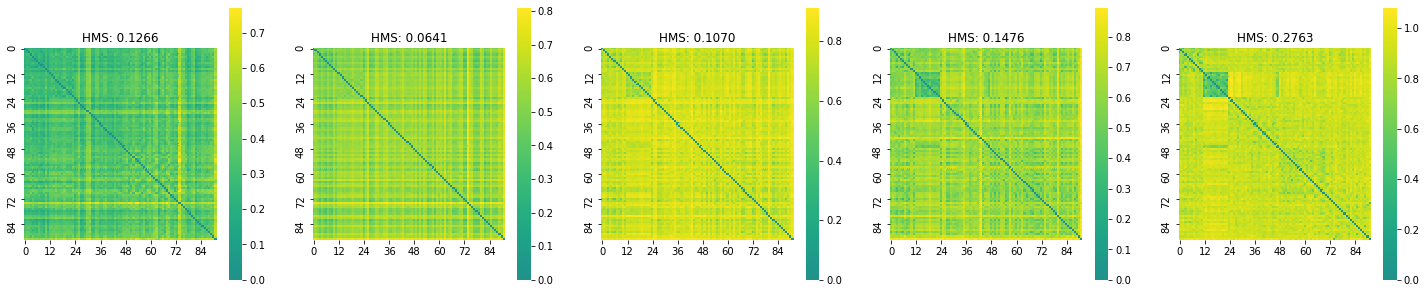

(array([[[0.        , 0.2349785 , 0.19588482, ..., 0.37029839,
          0.37091142, 0.52400076],
         [0.2349785 , 0.        , 0.21987152, ..., 0.4066903 ,
          0.43853861, 0.56257093],
         [0.19588482, 0.21987152, 0.        , ..., 0.40150702,
          0.38409621, 0.50089943],
         ...,
         [0.37029839, 0.4066903 , 0.40150702, ..., 0.        ,
          0.42860299, 0.62009013],
         [0.37091142, 0.43853861, 0.38409621, ..., 0.42860299,
          0.        , 0.60149777],
         [0.52400076, 0.56257093, 0.50089943, ..., 0.62009013,
          0.60149777, 0.        ]],
 
        [[0.        , 0.51719111, 0.44706118, ..., 0.60230088,
          0.54609036, 0.69970036],
         [0.51719111, 0.        , 0.50976247, ..., 0.64679778,
          0.5920248 , 0.74621421],
         [0.44706118, 0.50976247, 0.        , ..., 0.61923563,
          0.55892563, 0.70559382],
         ...,
         [0.60230088, 0.64679778, 0.61923563, ..., 0.        ,
          0.64414632, 0.

In [36]:
net.to(device)
plot_all_RDMs(net, 5, stimuli_set, humanIT_rdm)

# layer 2, b20, every epoch, lowcontrast

In [56]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_gaussian_epoch{epoch}_seedlist2.npy'
    np.save(filename, per_epoch)

epoch: 10
rdm humanIT_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_b20.0_seed209_epoch10_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_humanIT_b20.0_seed392_epoch10_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
G

Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed904_epoch10_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed963_epoch10_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian

Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanIT_bNone_seed558_epoch10_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_humanIT_bNone_seed829_epoch10_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Ga

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanIT_neg_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed209_epoch9_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_d

Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_humanEV_b20.0_seed829_epoch9_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_humanEV_b20.0_seed904_epoch9_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaus

Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_humanIT_b0_seed392_epoch8_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanIT_b0_seed558_epoch8_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 

Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_randn_b20.0_seed963_epoch8_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanEV_b20.0
seed 209
./state_dict/resnet18_layer2_humanEV_b20.0_seed209_ep

Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanIT_b20.0_seed558_epoch7_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_humanIT_b20.0_seed829_epoch7_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaus

Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm randn_b20.0
seed 209
./state_dict/resnet18_layer2_randn_b20.0_seed209_epoch7_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_randn_b20.0_seed392_epoch7_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussi

Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_humanIT_bNone_seed904_epoch7_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_humanIT_bNone_seed963_epoch7_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaus

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed558_epoch6_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_hu

Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_humanEV_b20.0_seed963_epoch6_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanIT_bNone
seed 209
./state_dict/resnet18_layer2_humanIT_bNone_seed209_epoch6_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22


Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_humanIT_b0_seed829_epoch5_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_humanIT_b0_seed904_epoch5_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0

Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_humanEV_b20.0_seed392_epoch5_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanEV_b20.0_seed558_epoch5_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaus

seed 904
./state_dict/resnet18_layer2_humanIT_b20.0_seed904_epoch4_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_humanIT_b20.0_seed963_epoch4_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gau

Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_randn_b20.0_seed558_epoch4_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_randn_b20.0_seed829_epoch4_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian

Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch: 3
rdm humanIT_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_b20.0_seed209_epoch3_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_humanIT_b20.0_seed392_epoch3_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gauss

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed904_epoch3_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_hu

Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_humanIT_bNone_seed392_epoch3_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanIT_bNone_seed558_epoch3_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaus

Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_humanIT_b0_seed963_epoch2_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
rdm humanIT_neg_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed209_epoch2_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 

Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 829
./state_dict/resnet18_layer2_humanEV_b20.0_seed829_epoch2_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_humanEV_b20.0_seed904_epoch2_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaus

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 392
./state_dict/resnet18_layer2_humanIT_b0_seed392_epoch1_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 558
./state_dict/resnet18_layer2_humanIT_b

Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 904
./state_dict/resnet18_layer2_randn_b20.0_seed904_epoch1_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
seed 963
./state_dict/resnet18_layer2_randn_b20.0_seed963_epoch1_luffycuda:5.pt
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian

In [194]:
highcontrast_dvals

[0.0,
 0.2,
 0.4,
 0.6,
 0.8,
 1.0,
 1.2544000000000002,
 1.4049280000000004,
 1.5735193600000006,
 1.7623416832000007,
 1.973822685184001,
 2.2106814074060814,
 2.4759631762948113,
 2.773078757450189,
 3.105848208344212,
 3.478549993345518,
 3.8959759925469806,
 4.363493111652619,
 4.887112285050933,
 5.4735657592570455,
 6.130393650367892,
 6.866040888412039,
 7.689965795021485,
 8.612761690424064,
 9.646293093274952,
 10.803848264467948,
 12.100310056204103,
 13.552347262948595,
 15.178628934502429,
 17.00006440664272,
 19.04007213543985,
 21.324880791692635,
 23.883866486695755,
 26.749930465099247,
 29.95992212091116]

In [65]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in [8, 15, 60, 97, 136, 191]:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:4.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_gaussianblur_epoch{epoch}.npy'
    np.save(filename, per_epoch)

epoch: 10
rdm humanIT_b20.0
seed 8
./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanIT_b20.0_seed15_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_humanIT_b20.0_seed60_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 

GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_randn_b20.0_seed97_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_randn_b20.0_seed136_epoch10_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
Ga

GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_b20.0_seed191_epoch9_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_b0
seed 8
./state_dict/resnet18_layer2_humanIT_b0_seed8_epoch9_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanIT_b0_seed15_epoch9_luffycuda:4.pt
cud

cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_humanEV_b20.0_seed60_epoch9_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_humanEV_b20.0_seed97_epoch9_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 1

GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_humanIT_b0_seed136_epoch8_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_b0_seed191_epoch8_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_neg_b20.0
seed 8
./state_dict/resnet18_layer2_humanIT_neg_b20.0_se

cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanIT_bNone_seed15_epoch8_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_humanIT_bNone_seed60_epoch8_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 1

GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed97_epoch7_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed136_epoch7_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_neg_

cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
epoch: 6
rdm humanIT_b20.0
seed 8
./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch6_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanIT_b20.0_seed15_epoch6_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
Gauss

GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_randn_b20.0_seed60_epoch6_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_randn_b20.0_seed97_epoch6_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_randn_b20.

cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_b20.0_seed191_epoch5_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_b0
seed 8
./state_dict/resnet18_layer2_humanIT_b0_seed8_epoch5_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
Ga

GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanEV_b20.0_seed15_epoch5_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_humanEV_b20.0_seed60_epoch5_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_humanEV_b20.0_seed97_ep

cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_humanIT_b0_seed136_epoch4_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_b0_seed191_epoch4_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13


GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_bNone
seed 8
./state_dict/resnet18_layer2_humanIT_bNone_seed8_epoch4_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanIT_bNone_seed15_epoch4_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_humanIT

cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed97_epoch3_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed136_epoch3_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
Gaus

GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_bNone_seed191_epoch3_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
epoch: 2
rdm humanIT_b20.0
seed 8
./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch2_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_lay

seed 15
./state_dict/resnet18_layer2_randn_b20.0_seed15_epoch2_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_randn_b20.0_seed60_epoch2_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 97
./state_dict/resnet18_layer2_randn_b20.0_seed97_epoch2_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
Gau

GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 136
./state_dict/resnet18_layer2_humanIT_b20.0_seed136_epoch1_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 191
./state_dict/resnet18_layer2_humanIT_b20.0_seed191_epoch1_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlu

GaussianBlur 19
GaussianBlur 20
rdm humanEV_b20.0
seed 8
./state_dict/resnet18_layer2_humanEV_b20.0_seed8_epoch1_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 15
./state_dict/resnet18_layer2_humanEV_b20.0_seed15_epoch1_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 60
./state_dict/resnet18_layer2_humanEV_b20.0_seed60_epoch1_luffycuda:4.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianB

In [ ]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'GaussianBlur',gaussianblur_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_gaussianblur_epoch{epoch}_seedlist2.npy'
    np.save(filename, per_epoch)

epoch: 10
rdm humanIT_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_b20.0_seed209_epoch10_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet18_layer2_humanIT_b20.0_seed392_epoch10_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 558
./state_dict/resnet18_layer2_humanIT_b20.0_seed558_epoch10_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
Gauss

GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 829
./state_dict/resnet18_layer2_randn_b20.0_seed829_epoch10_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 904
./state_dict/resnet18_layer2_randn_b20.0_seed904_epoch10_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
Ga

GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 963
./state_dict/resnet18_layer2_humanIT_b20.0_seed963_epoch9_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
rdm humanIT_b0
seed 209
./state_dict/resnet18_layer2_humanIT_b0_seed209_epoch9_luffycuda:5.pt
cuda:3
GaussianBlur 1
GaussianBlur 2
GaussianBlur 3
GaussianBlur 4
GaussianBlur 5
GaussianBlur 6
GaussianBlur 7
GaussianBlur 8
GaussianBlur 9
GaussianBlur 10
GaussianBlur 11
GaussianBlur 12
GaussianBlur 13
GaussianBlur 14
GaussianBlur 15
GaussianBlur 16
GaussianBlur 17
GaussianBlur 18
GaussianBlur 19
GaussianBlur 20
seed 392
./state_dict/resnet

In [26]:
uniform_dvals = [0.02*i for i in range(26)]

In [29]:
uniform_dvals

[0.0,
 0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5]

In [28]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'Uniform',uniform_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_uniform_epoch{epoch}_seedlist2.npy'
    np.save(filename, per_epoch)

epoch: 10
rdm humanIT_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_b20.0_seed209_epoch10_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 392
./state_dict/resnet18_layer2_humanIT_b20.0_seed392_epoch10_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 558
./state_dict/resnet18_layer2_humanIT_b20.0_seed558_epoch10_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04


Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 558
./state_dict/resnet18_layer2_randn_b20.0_seed558_epoch10_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 829
./state_dict/resnet18_layer2_randn_b20.0_seed829_epoch10_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Unifor

Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 829
./state_dict/resnet18_layer2_humanIT_b20.0_seed829_epoch9_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 904
./state_dict/resnet18_layer2_humanIT_b20.0_seed904_epoch9_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Unif

Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 904
./state_dict/resnet18_layer2_randn_b20.0_seed904_epoch9_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 963
./state_dict/resnet18_layer2_randn_b20.0_seed963_epoch9_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
rdm humanEV_b20.0
seed 209
./state_dict/resnet18_layer2_humanEV_b20.0_seed209_epoch9_luffycuda:5.pt
cuda:3
Uniform 0.0
Unifo

Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
rdm humanIT_b0
seed 209
./state_dict/resnet18_layer2_humanIT_b0_seed209_epoch8_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 392
./state_dict/resnet18_layer2_humanIT_b0_seed392_epoch8_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 

Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 392
./state_dict/resnet18_layer2_humanEV_b20.0_seed392_epoch8_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 558
./state_dict/resnet18_layer2_humanEV_b20.0_seed558_epoch8_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Unif

Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 558
./state_dict/resnet18_layer2_humanIT_b0_seed558_epoch7_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 829
./state_dict/resnet18_layer2_humanIT_b0_seed829_epoch7_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 904
./state_dict/resnet18_layer2_humanIT_b0_seed904_epoch7_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Un

Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 904
./state_dict/resnet18_layer2_humanEV_b20.0_seed904_epoch7_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 963
./state_dict/resnet18_layer2_humanEV_b20.0_seed963_epoch7_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Unif

Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 963
./state_dict/resnet18_layer2_humanIT_b0_seed963_epoch6_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
rdm humanIT_neg_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed209_epoch6_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform

Uniform 0.48
Uniform 0.5
rdm humanIT_bNone
seed 209
./state_dict/resnet18_layer2_humanIT_bNone_seed209_epoch6_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 392
./state_dict/resnet18_layer2_humanIT_bNone_seed392_epoch6_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 558
./state_dict/resnet18_layer2_humanIT_bNone_seed558_epoch6_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
U

Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 558
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed558_epoch5_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 829
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed829_epoch5_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0

Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 829
./state_dict/resnet18_layer2_humanIT_bNone_seed829_epoch5_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Uniform 0.48
Uniform 0.5
seed 904
./state_dict/resnet18_layer2_humanIT_bNone_seed904_epoch5_luffycuda:5.pt
cuda:3
Uniform 0.0
Uniform 0.02
Uniform 0.04
Uniform 0.06
Uniform 0.08
Uniform 0.1
Uniform 0.12
Uniform 0.14
Uniform 0.16
Uniform 0.18
Uniform 0.2
Uniform 0.22
Uniform 0.24
Uniform 0.26
Uniform 0.28
Uniform 0.3
Uniform 0.32
Uniform 0.34
Uniform 0.36
Uniform 0.38
Uniform 0.4
Uniform 0.42
Uniform 0.44
Uniform 0.46
Unif

KeyboardInterrupt: 

In [ ]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in [8, 15, 60, 97, 136, 191]:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:4.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'HighContrast',highcontrast_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_highcontrast_epoch{epoch}.npy'
    np.save(filename, per_epoch)

epoch: 10
rdm humanIT_b20.0
seed 8
./state_dict/resnet18_layer2_humanIT_b20.0_seed8_epoch10_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.040072135439

HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 60
./state_dict/resnet18_layer2_humanIT_b0_seed60_epoch10_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.9738226851

HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed97_epoch10_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.8038

HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 191
./state_dict/resnet18_layer2_randn_b20.0_seed191_epoch10_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContras

HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_bNone
seed 8
./state_dict/resnet18_layer2_humanIT_bNone_seed8_epoch10_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighC

cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighCont

HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_humanIT_b0_seed97_epoch9_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.1058482083

HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 136
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed136_epoch9_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.0

HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanEV_b20.0
seed 8
./state_dict/resnet18_layer2_humanEV_b20.0_seed8_epoch9_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighCont

HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 15
./state_dict/resnet18_layer2_humanIT_bNone_seed15_epoch9_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.61276169

HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_humanIT_b20.0_seed97_epoch8_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0

HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 136
./state_dict/resnet18_layer2_humanIT_b0_seed136_epoch8_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.88711228

cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighCont

HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 15
./state_dict/resnet18_layer2_humanEV_b20.0_seed15_epoch8_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.7730787

HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 60
./state_dict/resnet18_layer2_humanIT_bNone_seed60_epoch8_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.1786289

HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 136
./state_dict/resnet18_layer2_humanIT_b20.0_seed136_epoch7_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280

HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 191
./state_dict/resnet18_layer2_humanIT_b0_seed191_epoch7_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.68996579

HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 15
./state_dict/resnet18_layer

HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 60
./state_dict/resnet18_layer2_humanEV_b20.0_seed60_epoch7_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.89597599

seed 97
./state_dict/resnet18_layer2_humanIT_bNone_seed97_epoch7_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.32488079

HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 191
./state_dict/resnet18_layer2_humanIT_b20.0_seed191_epoch6_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822

HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_neg_b20.0
seed 8
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed8_epoch6_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
H

HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 60
./state_dict/resnet18_layer2_randn_b20.0_seed60_epoch6_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0

HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_humanEV_b20.0_seed97_epoch6_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657

cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighCont

HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_b0
seed 8
./state_dict/resnet18_layer2_humanIT_b0_seed8_epoch5_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast

HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 15
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed15_epoch5_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178

HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_randn_b20.0_seed97_epoch5_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.40492800000

HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 136
./state_dict/resnet18_layer2_humanEV_b20.0_seed136_epoch5_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.68996

HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
epoch: 4
rdm humanIT_b20.0
seed 8
./state_dict/resnet18_layer2_humanI

HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 15
./state_dict/resnet18_layer2_humanIT_b0_seed15_epoch4_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.89597599254

seed 60
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed60_epoch4_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.3248

HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 136
./state_dict/resnet18_layer2_randn_b20.0_seed136_epoch4_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.21068140

HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 191
./state_dict/resnet18_layer2_humanEV_b20.0_seed191_epoch4_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310

HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 15
./state_dict/resnet18_layer2_humanIT_b20.0_seed15_epoch3_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContra

HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 60
./state_dict/resnet18_layer2_humanIT_b0_seed60_epoch3_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650

HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
s

HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 191
./state_dict/resnet18_layer2_randn_b20.0_seed191_epoch3_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.1058482

HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanIT_bNone
seed 8
./state_dict/resnet18_layer2_humanIT_bNone_seed8_epoch3_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighCon

HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 60
./state_dict/resnet18_layer2_humanIT_b20.0_seed60_epoch2_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.573519360

HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_humanIT_b0_seed97_epoch2_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.61276169042

HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 191
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed191_epoch2_luffycuda:4.pt


HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm humanEV_b20.0
seed 8
./state_dict/resnet18_layer2_humanEV_b20.0_seed8_epoch2_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighCo

seed 15
./state_dict/resnet18_layer2_humanIT_bNone_seed15_epoch2_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.32488079

HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 97
./state_dict/resnet18_layer2_humanIT_b20.0_seed97_epoch1_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.97382268

HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
seed 136
./state_dict/resnet18_layer2_humanIT_b0_seed136_epoch1_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4
HighContrast 0.6
HighContrast 0.8
HighContrast 1.0
HighContrast 1.2544000000000002
HighContrast 1.4049280000000004
HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.8038482644

HighContrast 1.5735193600000006
HighContrast 1.7623416832000007
HighContrast 1.973822685184001
HighContrast 2.2106814074060814
HighContrast 2.4759631762948113
HighContrast 2.773078757450189
HighContrast 3.105848208344212
HighContrast 3.478549993345518
HighContrast 3.8959759925469806
HighContrast 4.363493111652619
HighContrast 4.887112285050933
HighContrast 5.4735657592570455
HighContrast 6.130393650367892
HighContrast 6.866040888412039
HighContrast 7.689965795021485
HighContrast 8.612761690424064
HighContrast 9.646293093274952
HighContrast 10.803848264467948
HighContrast 12.100310056204103
HighContrast 13.552347262948595
HighContrast 15.178628934502429
HighContrast 17.00006440664272
HighContrast 19.04007213543985
HighContrast 21.324880791692635
HighContrast 23.883866486695755
HighContrast 26.749930465099247
HighContrast 29.95992212091116
rdm randn_b20.0
seed 8
./state_dict/resnet18_layer2_randn_b20.0_seed8_epoch1_luffycuda:4.pt
cuda:3
HighContrast 0.0
HighContrast 0.2
HighContrast 0.4


In [ ]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'HighContrast',highcontrast_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_highcontrast_epoch{epoch}_seedlist2.npy'
    np.save(filename, per_epoch)

In [12]:
seed_list2= [209, 392, 558, 829, 904, 963]

In [21]:
device

device(type='cuda', index=3)

In [14]:
lowcontrast_dvals

[0.0,
 0.04,
 0.08,
 0.12,
 0.16,
 0.2,
 0.24,
 0.28,
 0.32,
 0.36,
 0.4,
 0.44,
 0.48,
 0.5,
 0.52,
 0.54,
 0.56,
 0.58,
 0.6,
 0.62,
 0.64,
 0.66,
 0.68,
 0.7000000000000001,
 0.72,
 0.74,
 0.76,
 0.78,
 0.8,
 0.8200000000000001,
 0.84,
 0.86,
 0.88,
 0.9,
 0.92,
 0.9400000000000001,
 0.96,
 0.98,
 1.0]

In [16]:
for epoch in range(10,0,-1):
    print("epoch:", epoch)
    per_epoch=[]
    for rdm in ['humanIT_b20.0','humanIT_b0','humanIT_neg_b20.0','randn_b20.0','humanEV_b20.0','humanIT_bNone']:
        print("rdm", rdm)
        per_rdm=[]
        for seed in seed_list2:
            print("seed", seed)
            path = f'./state_dict/resnet18_layer2_{rdm}_seed{seed}_epoch{epoch}_luffycuda:5.pt'
            print(path)
            net = myResnet18()
            net.load_state_dict(torch.load(path, map_location=device))
            robust_result = robust_test_topk(net,'LowContrast',lowcontrast_dvals, (1,2,3,4,5))
            robust_result = np.array(robust_result).transpose()
            per_rdm.append(robust_result)
        per_epoch.append(per_rdm)
    per_epoch = np.array(per_epoch)
    filename = f'./robust/resnet18_layer2_robust_lowcontrast_epoch{epoch}_seedlist2.npy'
    np.save(filename, per_epoch)

epoch: 10
rdm humanIT_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_b20.0_seed209_epoch10_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_humanIT_b20.0_seed392_epoch10_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast

LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_humanIT_b0_seed963_epoch10_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72


LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_randn_b20.0_seed829_epoch10_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_di

LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_humanIT_bNone_seed558_epoch10_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast

LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm humanIT_b0
seed 209
./state_dict/resnet18_layer2_humanIT_b0_seed209_epoch9_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.82000

LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed904_epoch9_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed963_epoch9_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
Low

LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_humanEV_b20.0_seed829_epoch9_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0

LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_humanIT_b20.0_seed392_epoch8_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
L

cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm humanIT_neg_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed209_epoch8_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0

LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_dict/resnet18_layer2_randn_b20.0_seed904_epoch8_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8


LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_humanIT_bNone_seed558_epoch8_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_humanIT_bNone_seed829_epoch8_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast

LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_humanIT_b0_seed392_epoch7_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62

LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed963_epoch7_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.94000000000000

cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_dict/resnet18_layer2_humanEV_b20.0_seed904_epoch7_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowCon

LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_humanIT_b20.0_seed558_epoch6_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.

LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm humanIT_neg_b20.0
seed 209
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed209_epoch6_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed392_epoch6_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 

LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_randn_b20.0_seed963_epoch6_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.6

LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_humanIT_bNone_seed829_epoch6_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
L

cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_humanIT_b0_seed558_epoch5_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContra

LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm randn_b20.0
seed 209
./state_dict/resnet18_layer2_randn_b20.0_seed209_epoch5_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
L

LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_dict/resnet18_layer2_humanEV_b20.0_seed904_epoch5_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_humanEV_b20.0_seed963_epoch5_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast

LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_humanIT_b20.0_seed829_epoch4_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0

LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed392_epoch4_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.

cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm humanEV_b20.0
seed 209
./state_dict/resnet18_layer2_humanEV_b20.0_seed209_epoch4_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowCo

LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_dict/resnet18_layer2_humanIT_bNone_seed904_epoch4_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8

LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_humanIT_b0_seed558_epoch3_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_humanIT_b0_seed829_epoch3_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04


LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_randn_b20.0_seed392_epoch3_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.

LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_humanEV_b20.0_seed963_epoch3_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
L

cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 904
./state_dict/resnet18_layer2_humanIT_b20.0_seed904_epoch2_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowCon

LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_humanIT_neg_b20.0_seed558_epoch2_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast

LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm humanEV_b20.0
seed 209
./state_dict/resnet18_layer2_humanEV_b20.0_seed209_epoch2_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 392
./state_dict/resnet18_layer2_humanEV_b20.0_seed392_epoch2_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContras

LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 963
./state_dict/resnet18_layer2_humanIT_bNone_seed963_epoch2_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0

LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 829
./state_dict/resnet18_layer2_humanIT_b0_seed829_epoch1_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowC

cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
seed 558
./state_dict/resnet18_layer2_randn_b20.0_seed558_epoch1_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContr

LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0.8200000000000001
LowContrast 0.84
LowContrast 0.86
LowContrast 0.88
LowContrast 0.9
LowContrast 0.92
LowContrast 0.9400000000000001
LowContrast 0.96
LowContrast 0.98
LowContrast 1.0
rdm humanIT_bNone
seed 209
./state_dict/resnet18_layer2_humanIT_bNone_seed209_epoch1_luffycuda:5.pt
cuda:3
LowContrast 0.0
LowContrast 0.04
LowContrast 0.08
LowContrast 0.12
LowContrast 0.16
LowContrast 0.2
LowContrast 0.24
LowContrast 0.28
LowContrast 0.32
LowContrast 0.36
LowContrast 0.4
LowContrast 0.44
LowContrast 0.48
LowContrast 0.5
LowContrast 0.52
LowContrast 0.54
LowContrast 0.56
LowContrast 0.58
LowContrast 0.6
LowContrast 0.62
LowContrast 0.64
LowContrast 0.66
LowContrast 0.68
LowContrast 0.7000000000000001
LowContrast 0.72
LowContrast 0.74
LowContrast 0.76
LowContrast 0.78
LowContrast 0.8
LowContrast 0

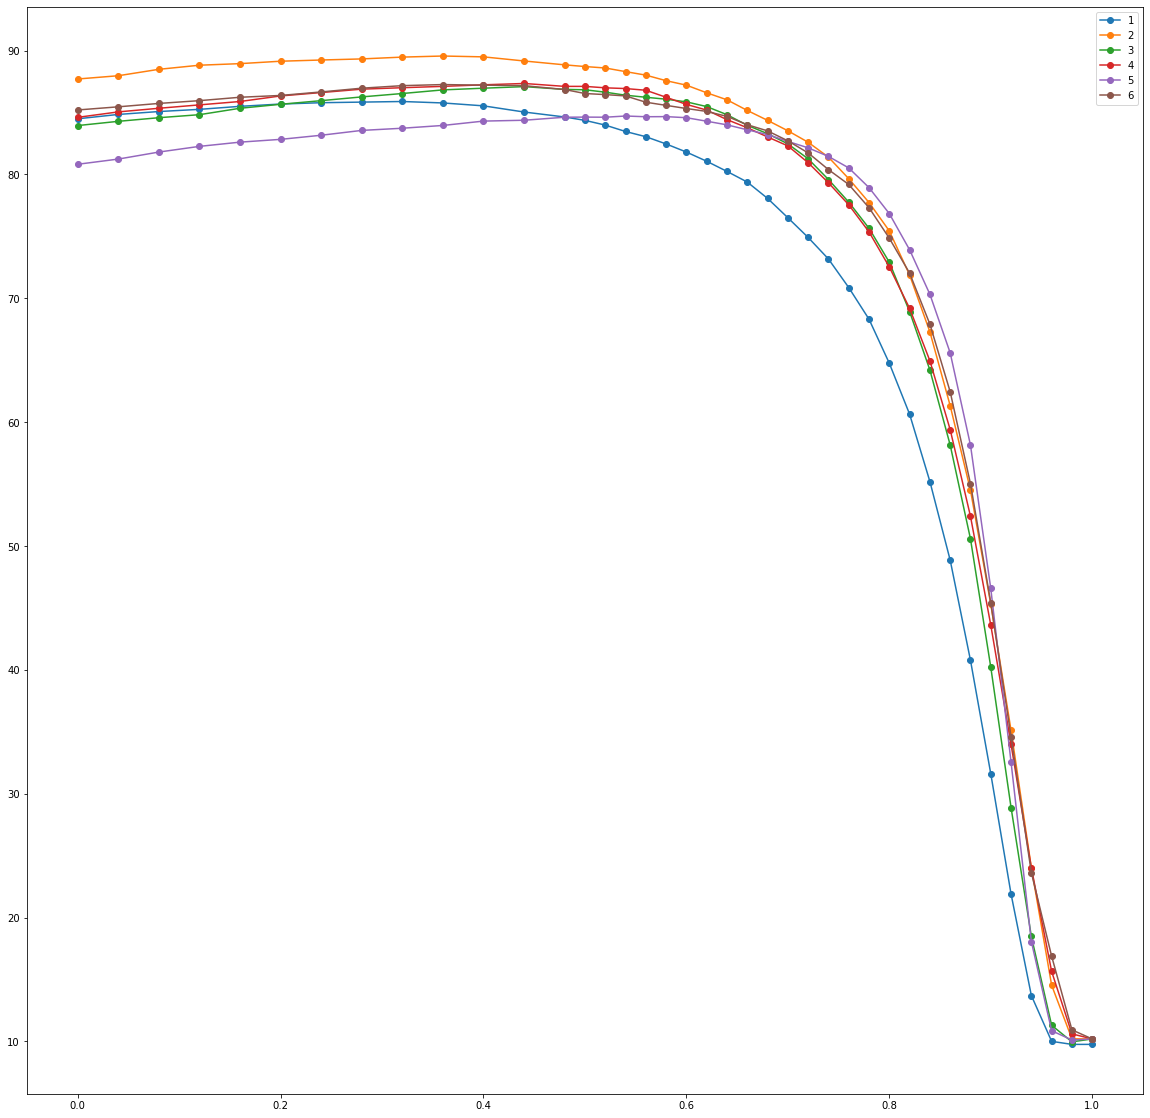

In [135]:
plt.figure(figsize=(20,20))
for i in range(6):
    plt.plot(lowcontrast_dvals, layer2_humanIT_b20_robust_lowcontrast_list[i][0], '-o')
plt.legend(['1','2','3','4','5','6','7','8','9','10'])

In [19]:
import math

In [20]:
highcontrast_dvals = [0.0,0.2,0.4,0.6,0.8,1.0]+[math.pow(1.12, i) for i in range(2,31)] #[0.5*i for i in range(20)]+[1.0+1.0*i for i in range(30)]

print(highcontrast_dvals)


[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2544000000000002, 1.4049280000000004, 1.5735193600000006, 1.7623416832000007, 1.973822685184001, 2.2106814074060814, 2.4759631762948113, 2.773078757450189, 3.105848208344212, 3.478549993345518, 3.8959759925469806, 4.363493111652619, 4.887112285050933, 5.4735657592570455, 6.130393650367892, 6.866040888412039, 7.689965795021485, 8.612761690424064, 9.646293093274952, 10.803848264467948, 12.100310056204103, 13.552347262948595, 15.178628934502429, 17.00006440664272, 19.04007213543985, 21.324880791692635, 23.883866486695755, 26.749930465099247, 29.95992212091116]


In [21]:
start = time.time()
net = myResnet18()
net.load_state_dict(torch.load('./state_dict/resnet18_layer4_humanIT_b0.01_seed8_epoch1_luffycuda:4.pt', map_location=device))
robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
robust_result = np.array(robust_result).transpose()
end = time.time()
print('time used:', (end-start)/60, 'min')

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
time used: 3.2610047578811647 min


In [22]:
layer4_humanIT_b01_robust_gaussian_list=[]
layer4_humanIT_b01_robust_gaussian_list.append(robust_result)

In [23]:
layer4_humanIT_b01_robust_gaussian_list

[array([[87.17773438, 86.0546875 , 84.07226562, 81.63085938, 77.421875  ,
         72.8515625 , 68.06640625, 63.60351562, 57.79296875, 52.5390625 ,
         47.1484375 , 41.73828125, 36.5234375 , 30.88867188, 26.71875   ,
         22.19726562, 19.12109375, 16.7578125 , 14.8046875 , 13.671875  ,
         12.88085938, 12.33398438, 11.640625  , 11.1328125 , 11.25      ,
         10.96679688, 10.44921875, 10.41992188, 10.40039062, 10.234375  ,
         10.34179688],
        [95.26367188, 94.78515625, 94.1796875 , 92.59765625, 90.28320312,
         87.33398438, 84.13085938, 80.7421875 , 75.36132812, 70.29296875,
         65.16601562, 59.32617188, 53.984375  , 48.52539062, 43.25195312,
         38.90625   , 35.48828125, 32.41210938, 29.81445312, 28.01757812,
         26.7578125 , 25.72265625, 25.06835938, 24.38476562, 23.9453125 ,
         23.91601562, 23.56445312, 23.31054688, 23.4765625 , 23.14453125,
         22.87109375],
        [97.82226562, 97.7734375 , 97.11914062, 96.41601562, 94.93

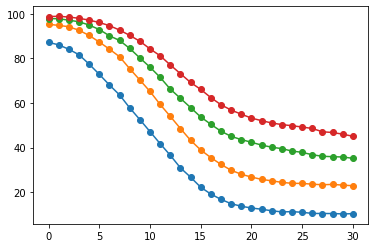

In [26]:
plt.plot(robust_result[0],'o-')
plt.plot(robust_result[1],'o-')
plt.plot(robust_result[2],'o-')
plt.plot(robust_result[3],'o-')

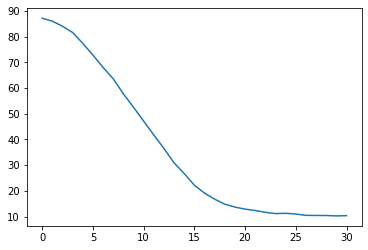

In [29]:
plt.plot(layer4_humanIT_b01_robust_gaussian_list[0][0])

In [27]:
device

device(type='cuda', index=3)

In [30]:
for i in range(2,11):
    path = './state_dict/resnet18_layer4_humanIT_b0.01_seed8_epoch'+str(i)+'_luffycuda:4.pt'
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b01_robust_gaussian_list.append(robust_result)

cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian

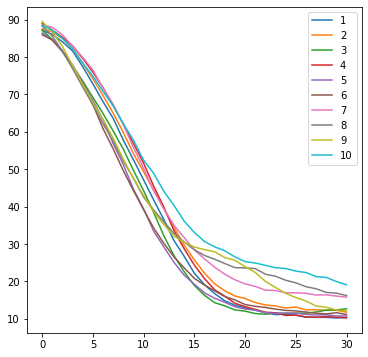

In [42]:
plt.figure(figsize=(6,6))
for i in range(10):
    plt.plot(layer4_humanIT_b01_robust_gaussian_list[i][0])
plt.legend(['1','2','3','4','5','6','7','8','9','10'])

In [33]:
len(layer4_humanIT_b01_robust_gaussian_list)

10

In [37]:
layer4_humanIT_b0o1_robust_gaussian_list=[]
for i in range(1,11):
    path = f'./state_dict/resnet18_layer4_humanIT_b0.1_seed8_epoch{i}_luffycuda:4.pt'
    print('epoch',i)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b0o1_robust_gaussian_list.append(robust_result)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

In [44]:
layer4_humanIT_b1_robust_gaussian_list=[]
for i in range(1,11):
    path = f'./state_dict/resnet18_layer4_humanIT_b1_seed8_epoch{i}_luffycuda:4.pt'
    print('epoch',i)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b1_robust_gaussian_list.append(robust_result)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

In [52]:
layer4_humanIT_b0_robust_gaussian_list=[]
for i in range(1,11):
    path = f'./state_dict/resnet18_layer4_humanIT_b0.0_seed8_epoch{i}_luffycuda:4.pt'
    print('epoch',i)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b0_robust_gaussian_list.append(robust_result)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

In [71]:
layer4_humanIT_b0int_robust_gaussian_list=[]
for i in range(1,11):
    path = f'./state_dict/resnet18_layer4_humanIT_b0_seed8_epoch{i}_luffycuda:4.pt'
    print('epoch',i)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b0int_robust_gaussian_list.append(robust_result)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

In [108]:
layer4_humanIT_b1_robust_gaussian_list_batch2=[]
for i in range(1,11):
    path = f'./state_dict/layer4_batch2/resnet18_layer4_humanIT_b1_seed8_epoch{i}_luffycuda:4.pt'
    print('epoch',i)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b1_robust_gaussian_list_batch2.append(robust_result)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

In [109]:
layer4_humanIT_b1_robust_gaussian_list_batch4=[]
for i in range(1,11):
    path = f'./state_dict/layer4_batch4/resnet18_layer4_humanIT_b1_seed8_epoch{i}_luffycuda:4.pt'
    print('epoch',i)
    net = myResnet18()
    net.load_state_dict(torch.load(path, map_location=device))
    robust_result = robust_test_topk(net,'Gaussian',gaussian_dvals, (1,2,3,4,5))
    robust_result = np.array(robust_result).transpose()
    layer4_humanIT_b1_robust_gaussian_list_batch4.append(robust_result)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

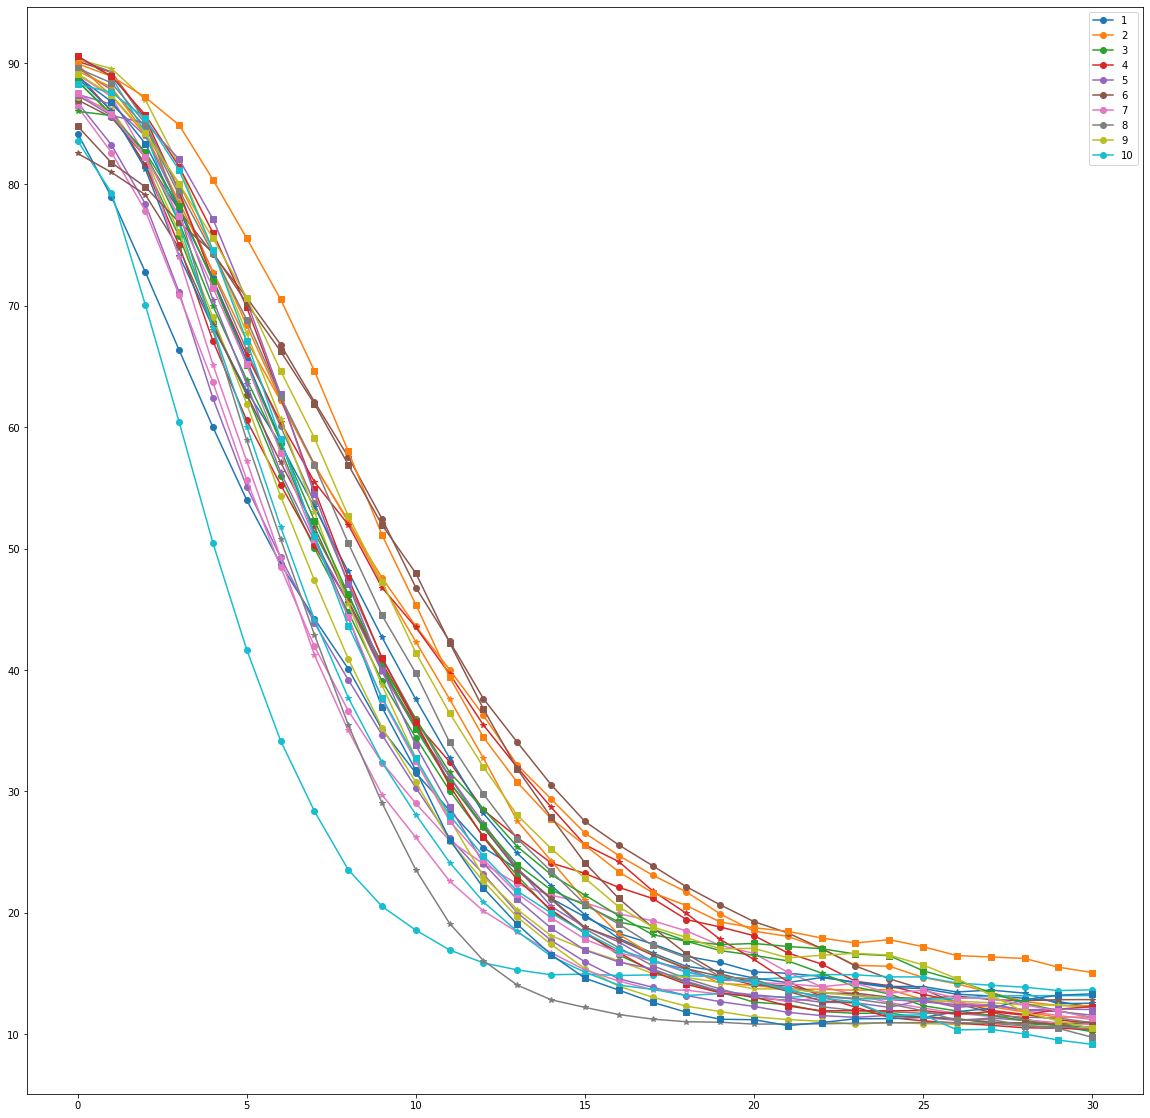

In [141]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.plot(layer4_humanIT_b1_robust_gaussian_list_batch2[i][0],'-o')
plt.legend(['1','2','3','4','5','6','7','8','9','10'])

for i in range(10):
    plt.plot(layer4_humanIT_b1_robust_gaussian_list_batch4[i][0],'*-')
plt.legend(['1','2','3','4','5','6','7','8','9','10'])

for i in range(10):
    plt.plot(layer4_humanIT_b1_robust_gaussian_list[i][0],'-s')

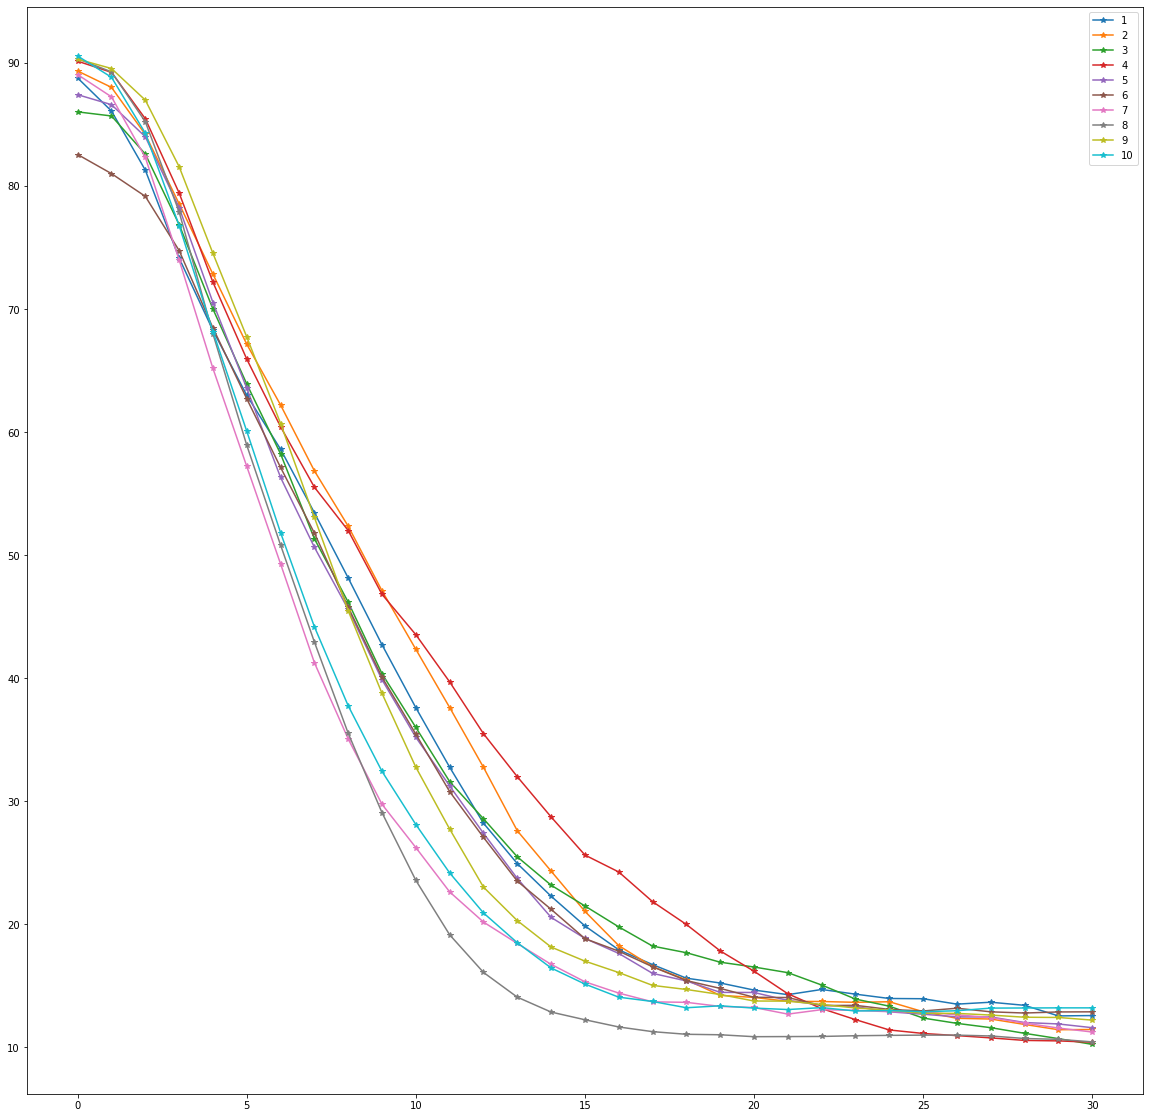

In [140]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.plot(layer4_humanIT_b1_robust_gaussian_list_batch4[i][0],'*-')
plt.legend(['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
resnet18_layer4_humanIT_b0.0_seed8_epoch1_luffycuda:4.pt

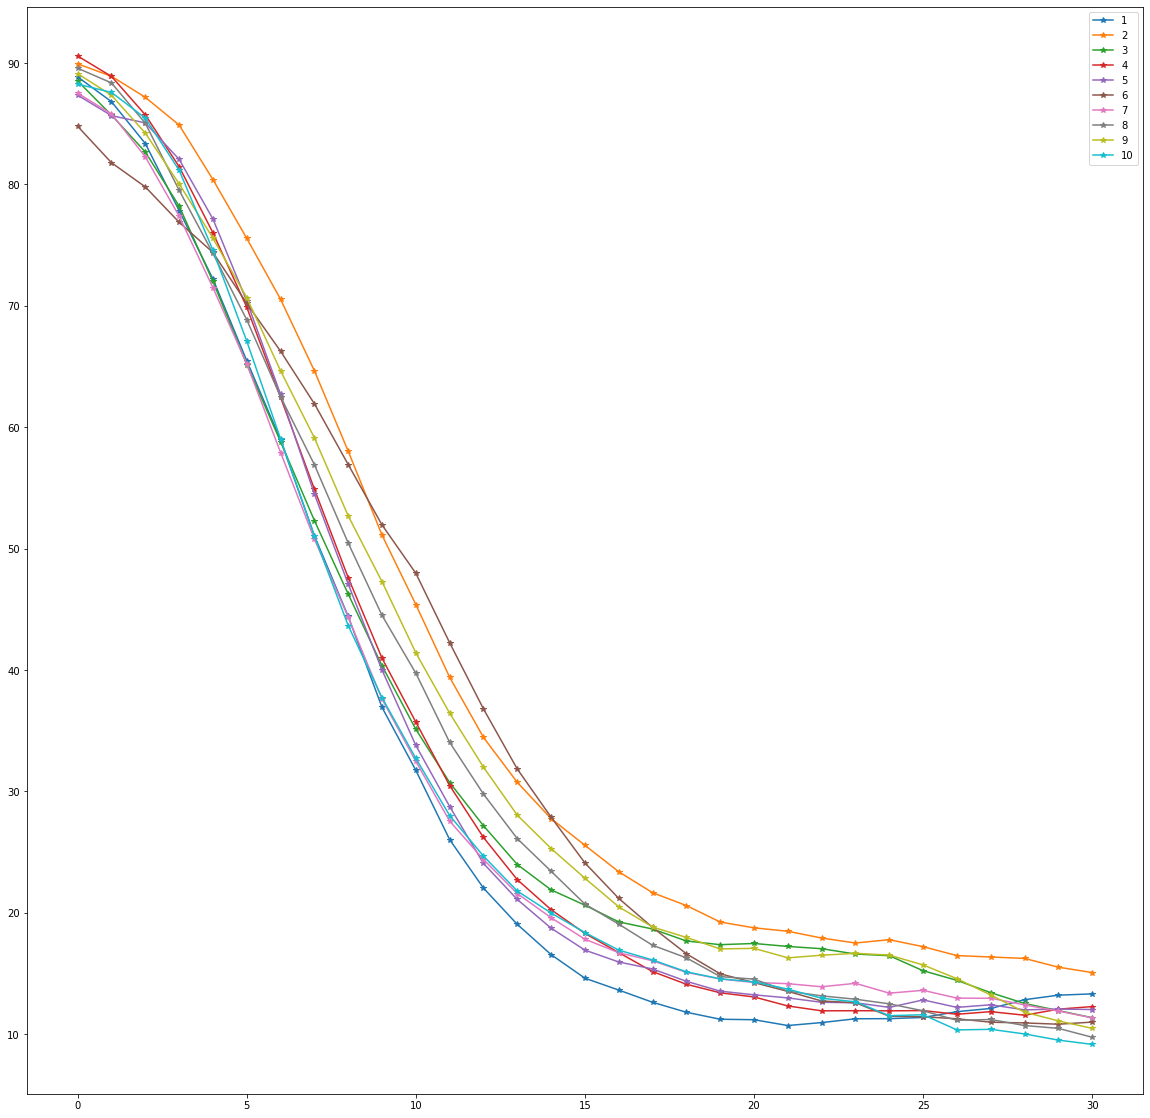

In [136]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.plot(layer4_humanIT_b0o1_robust_gaussian_list[i][0])
for i in range(10):
    plt.plot(layer4_humanIT_b01_robust_gaussian_list[i][0],'o-')
for i in range(10):
    plt.plot(layer4_humanIT_b1_robust_gaussian_list[i][0],'*-')
# for i in range(10):
#     plt.plot(layer4_humanIT_b0_robust_gaussian_list[i][0],'^-')
# for i in range(10):
#     plt.plot(layer4_humanIT_b0int_robust_gaussian_list[i][0],'s-')
plt.legend(['1','2','3','4','5','6','7','8','9','10'])

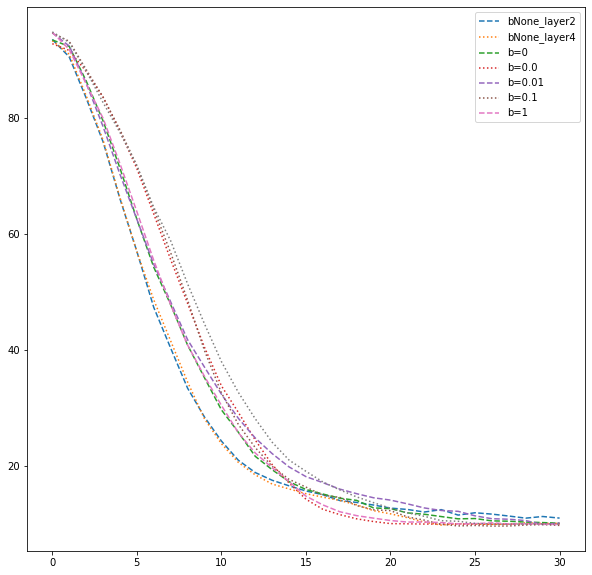

In [153]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.plot(layer2_humanIT_bNone_robust_gaussian_list[i][0], '--')
    plt.plot(layer4_humanIT_bNone_robust_gaussian_list[i][0], ':')
#     plt.plot(layer4_humanIT_b0int_robust_gaussian_list[i][0],'s-')
#     plt.plot(layer4_humanIT_b0_robust_gaussian_list[i][0],'^-')
#     plt.plot(layer4_humanIT_b01_robust_gaussian_list[i][0],'o-')
#     plt.plot(layer4_humanIT_b0o1_robust_gaussian_list[i][0])
#     plt.plot(layer4_humanIT_b1_robust_gaussian_list[i][0],'*-')
plt.legend(['bNone_layer2','bNone_layer4','b=0', 'b=0.0', 'b=0.01', 'b=0.1', 'b=1'])

In [103]:
layer4_humanIT_bNone_robust_gaussian_list = compare_beta(bval=None)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

In [106]:
layer2_humanIT_bNone_robust_gaussian_list = compare_beta(bval=None)

epoch 1
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 2
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.06
Gaussian 0.07
Gaussian 0.08
Gaussian 0.09
Gaussian 0.1
Gaussian 0.11
Gaussian 0.12
Gaussian 0.13
Gaussian 0.14
Gaussian 0.15
Gaussian 0.16
Gaussian 0.17
Gaussian 0.18
Gaussian 0.19
Gaussian 0.2
Gaussian 0.21
Gaussian 0.22
Gaussian 0.23
Gaussian 0.24
Gaussian 0.25
Gaussian 0.26
Gaussian 0.27
Gaussian 0.28
Gaussian 0.29
Gaussian 0.3
epoch 3
cuda:3
Gaussian 0.0
Gaussian 0.01
Gaussian 0.02
Gaussian 0.03
Gaussian 0.04
Gaussian 0.05
Gaussian 0.0

# NoiseHighContrast

In [105]:
def compare_beta(bval, dtype='Gaussian', dvals =gaussian_dvals):
    robust_list=[]
    for i in range(1,11):
        path = f'./state_dict/resnet18_layer2_humanIT_b{bval}_seed8_epoch{i}_luffycuda:4.pt'
        print('epoch',i)
        net = myResnet18()
        net.load_state_dict(torch.load(path, map_location=device))
        robust_result = robust_test_topk(net,dtype,gaussian_dvals, (1,2,3,4,5))
        robust_result = np.array(robust_result).transpose()
        robust_list.append(robust_result)
    return robust_list

In [100]:
noisehighcontrast_dvals = [ 0.0        ,  0.2       ,  0.4       ,  0.6       ,  0.8       ,
        1.0        ,  1.2544    ,  1.404928  ,  1.57351936,  1.76234168,
        1.97382269,  2.21068141,  2.47596318,  2.77307876,  3.10584821,
        3.47854999,  3.89597599,  4.36349311,  4.88711229,  5.47356576,
        6.13039365,  6.86604089,  7.6899658 ,  8.61276169,  9.64629309,
       10.80384826, 12.10031006, 13.55234726, 15.17862893, 17.00006441,
       19.04007214, 21.32488079, 23.88386649, 26.74993047, 29.95992212]

In [102]:
layer4_humanIT_b0_robust_noisehighcontrast_list = compare_beta('0', 'NoiseHighContrast', noisehighcontrast_dvals)

epoch 1
cuda:3
NoiseHighContrast 0.0
NoiseHighContrast 0.01
NoiseHighContrast 0.02


Process Process-6241:
Exception ignored in: <function _releaseLock at 0x7f3f4bebe0d0>
Traceback (most recent call last):
  File "/usr/local/anaconda3/2020.07/lib/python3.8/logging/__init__.py", line 223, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/2020.07/lib/python3.8/multiprocessing/process.py", line 308, in _bootstrap
    util._run_after_forkers()
  File "/usr/local/anaconda3/2020.07/lib/python3.8/multiprocessing/util.py", line 163, in _run_after_forkers
    items = list(_afterfork_registry.items())
  File "/usr/local/anaconda3/2020.07/lib/python3.8/weakref.py", line 211, in items
    yield k, v
KeyboardInterrupt


RuntimeError: DataLoader worker (pid(s) 2135024) exited unexpectedly

In [14]:
gaussian_dvals = [i*0.01 for i in range(31)]

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3]

In [12]:
robust_result = robust_test_topk(net_luffy,'Gaussian',gaussian_dvals, (1,2,3,4,5))

0.03